# Assignment


You have already picked out the dataset you want to work with. 

----

# Question 
1. EDA, i want to see some insights, present it neatly. 
2. Fit a Decision Tree Regressor model on your data. 
3. I want to see the training and testing accuracy of your model. So do split your data before modelling.


### Brownie Points (Extra 15 points)
- Lastly, i want to see a function where i can input my values and get a prediction of whatever you are trying to predict. Think this through !!.



Best of luck !!

![](https://media.tenor.com/mUVjXo5LhsQAAAAC/kakashi-yes.gif)


In [1]:
# Importing Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec
from matplotlib.gridspec import GridSpec

import seaborn as sns

import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

# Some styling
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")

import plotly.io as pio
pio.templates.default = "gridon"

# Subplots
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv("House Prices.csv")

In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

# Identifying the NA values

In [5]:
#First we create a list of missing values by each feature
temp = list(df.isna().sum())

#then we create a list of columns and their missing values as inner list to a separate list
lst= []
i=0
for col in df.columns:
    insert_lst = [col,temp[i]]
    lst.append(insert_lst)
    i+=1

#finally create a dataframe
temp_df = pd.DataFrame(data=lst,columns=['Column_Name','Missing_Values'])

In [6]:
fig = px.bar(temp_df.sort_values(by='Missing_Values'),x='Missing_Values',y='Column_Name',
             orientation='h',height=1000,width=900,color='Missing_Values',text='Missing_Values',title='Missing values in train dataset')
fig.update_traces(textposition='outside')
fig.show()

# Filling the NA values

In [7]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace = True)

In [9]:
df['MasVnrType'].fillna("None", inplace = True)

In [10]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace = True)

In [11]:
df['Alley'].fillna("Pave", inplace = True)

In [12]:
df['FireplaceQu'].fillna("TA", inplace = True)

In [13]:
df['Electrical'].fillna("Mix", inplace = True)

In [14]:
df['BsmtCond'].fillna("TA", inplace = True)

In [15]:
df['BsmtExposure'].fillna("AV", inplace = True)

In [16]:
df['BsmtFinType1'].fillna("ALQ", inplace = True)

In [17]:
df['BsmtFinType2'].fillna("ALQ", inplace = True)

In [18]:
df['FireplaceQu'].fillna("TA", inplace = True)

In [19]:
df['GarageType'].fillna("2Types", inplace = True)

In [20]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace = True)

In [21]:
df['GarageQual'].fillna("TA", inplace = True)

In [22]:
df['GarageCond'].fillna("TA", inplace = True)

In [23]:
df['PoolQC'].fillna("Ex", inplace = True)

In [24]:
df['Fence'].fillna("GdPrv", inplace = True)

In [25]:
df['MiscFeature'].fillna("Gar2", inplace = True)

In [26]:
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave  Pave      Reg   
1        2          20       RL         80.0     9600   Pave  Pave      Reg   
2        3          60       RL         68.0    11250   Pave  Pave      IR1   
3        4          70       RL         60.0     9550   Pave  Pave      IR1   
4        5          60       RL         84.0    14260   Pave  Pave      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave  Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave  Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave  Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave  Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave  Pave      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0     Ex  GdPrv        Gar2       0   
1            Lvl    AllPub  ...        0     Ex  GdPrv        Gar2       0   
2            Lvl    AllPub  ...        0     Ex  GdPrv        Gar2       0   
3            Lvl    AllPub  ...        0     Ex  GdPrv        Gar2       0   
4            Lvl    AllPub  ...        0     Ex  GdPrv        Gar2       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0     Ex  GdPrv        Gar2       0   
1456         Lvl    AllPub  ...        0     Ex  MnPrv        Gar2       0   
1457         Lvl    AllPub  ...        0     Ex  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0     Ex  GdPrv        Gar2       0   
1459         Lvl    AllPub  ...        0     Ex  GdPrv        Gar2       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

# -----------------------------------Exploratory Data Analysis---------------------------------------

![](https://th.bing.com/th/id/R.c61b407257c30373b1c3c65cf6b79ea5?rik=HOgdSrNOQOG%2bxw&pid=ImgRaw&r=0)

In [27]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Histogram(x=df['SalePrice']),row=1,col=1)
fig.add_trace(go.Box(y=df['SalePrice'],boxpoints='all',line_color='orange'),row=1,col=2)

fig.update_layout(height=500, showlegend=False,title_text="Sale Price Distribution and Box Plot")

# Insight:

- Sale Price has a right skewed distribution.
- The median sale price of our dataset is 163000 which is less than the average value i.e because of right skewed distribution.
- We can see some of the houses have sale price more than 4,00,000.

In [29]:
# Here we create a list of all the discrete features in our dataset.
discrete=[]
for col in df.columns:
    if df[col].dtype=='int64' and len(df[col].unique()) <=15:
        discrete.append(col)

In [30]:
print("Discrete Features :: \n\n{}".format(discrete))

Discrete Features :: 

['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea', 'MoSold', 'YrSold']


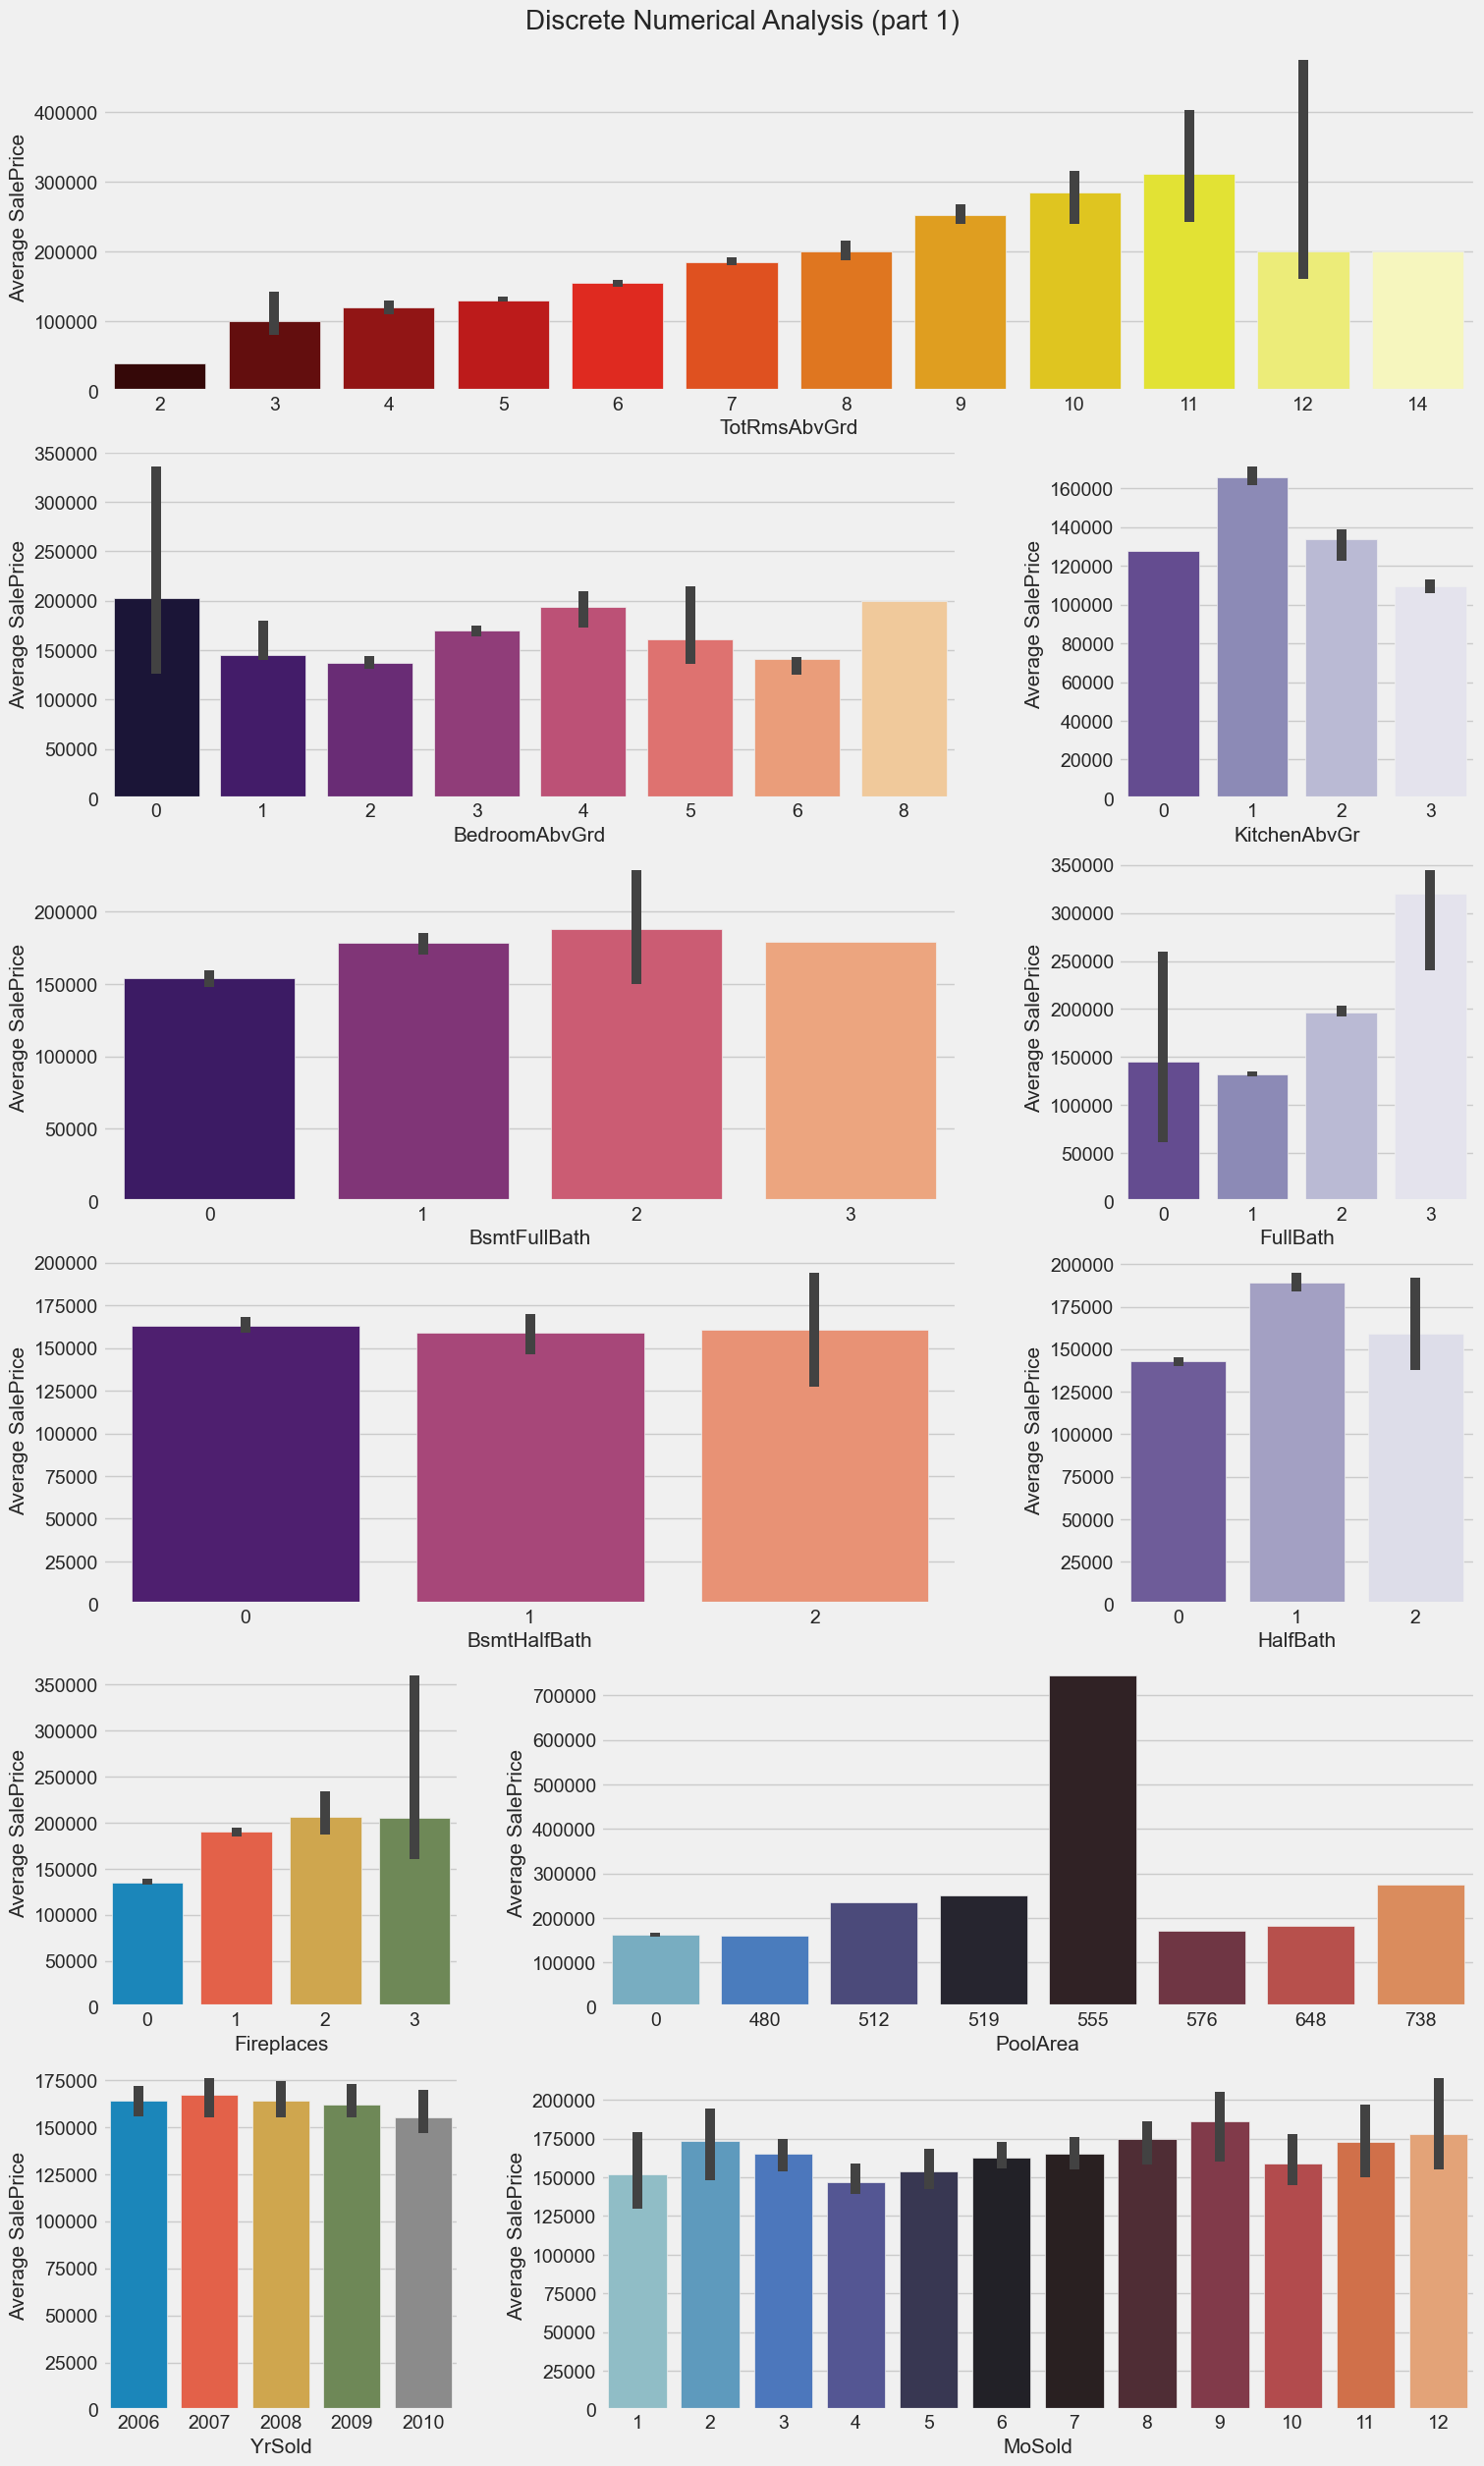

In [31]:
from numpy import median

fig = plt.figure(constrained_layout=True,figsize=(15,25))
gs = GridSpec(6, 3, figure=fig)

plt.subplot(gs[0,:])
a1 = sns.barplot(data=df,x="TotRmsAbvGrd",y="SalePrice",estimator=median,palette='hot')
plt.xlabel("TotRmsAbvGrd",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[1,:-1])
a1 = sns.barplot(data=df,x="BedroomAbvGr",y="SalePrice",estimator=median,palette='magma')
plt.xlabel("BedroomAbvGrd",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[1,-1])
a1 = sns.barplot(data=df,x="KitchenAbvGr",y="SalePrice",estimator=median,palette='Purples_r')
plt.xlabel("KitchenAbvGr",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[2,:-1])
a1 = sns.barplot(data=df,x="BsmtFullBath",y="SalePrice",estimator=median,palette='magma')
plt.xlabel("BsmtFullBath",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[2,-1])
a1 = sns.barplot(data=df,x="FullBath",y="SalePrice",estimator=median,palette='Purples_r')
plt.xlabel("FullBath",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[3,:-1])
a1 = sns.barplot(data=df,x="BsmtHalfBath",y="SalePrice",estimator=median,palette='magma')
plt.xlabel("BsmtHalfBath",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[3,-1])
a1 = sns.barplot(data=df,x="HalfBath",y="SalePrice",estimator=median,palette='Purples_r')
plt.xlabel("HalfBath",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[4,:-2])
a1 = sns.barplot(data=df,x="Fireplaces",y="SalePrice",estimator=median)
plt.xlabel("Fireplaces",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[4,-2:])
a1 = sns.barplot(data=df,x="PoolArea",y="SalePrice",estimator=median,palette='icefire')
plt.xlabel("PoolArea",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[5,:-2])
a1 = sns.barplot(data=df,x="YrSold",y="SalePrice",estimator=median)
plt.xlabel("YrSold",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.subplot(gs[5,-2:])
a1 = sns.barplot(data=df,x="MoSold",y="SalePrice",estimator=median,palette='icefire')
plt.xlabel("MoSold",fontsize=15)
plt.ylabel("Average SalePrice",fontsize=15)

plt.suptitle("Discrete Numerical Analysis (part 1)",fontsize=20);

# Insight: 

- Total Rooms Above Ground - As the total number of rooms increases , average price of the house increase until 11 rooms after which it sees a decrease in price.

- Bedroom Above Ground - Here we don't see a exponential curve, as for 0 bedrooms the sale price is highest followed by 4 and 8 bedrooms.The lowest is for 2 and 6 bedrooms.

- Kitchen Above ground - Here as the number increases , price decreases.Price is highest for only one kitchent that is enough .No one demands for more than one kitchen.

- InBasemnt Full bathroomsandBasement Half bathrooms - we don't see a much difference.If there is no bathroom,obviously price will be less.

- Now if we don't consider basement rooms,i.e Above grade Full Bathrooms and Half bathrooms .If there are 3 full bathrooms ,the price is highest and for 1 or 2 half bathrooms the average price is more than 150000.

- Fireplaces - As fireplaces will increase in the house , sale price will also increase.

- PoolArea - Here we are talking about square feet. And from the barplot 555 sqft area is having highest sale price on average.More Area , More Sale Price.

- Year Sold - The houses in our dataset were sold from year 2006.We can see a bit downward slope from 2006 to 2010.

- Month Sold - There is not much to study about which month the house sold has higher or lower Sale Price.

# Creating a list of all the numerical features in our dataset

In [33]:
num = []

for col in df.columns:
    if df[col].dtype=='int64' and col not in ['YearBuilt','YearRemodAdd','MoSold','YrSold','GarageYrBlt'] and col not in discrete:
        num.append(col)

In [34]:
print("Numerical Features :: \n\n{}".format(num))

Numerical Features :: 

['Id', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'SalePrice']


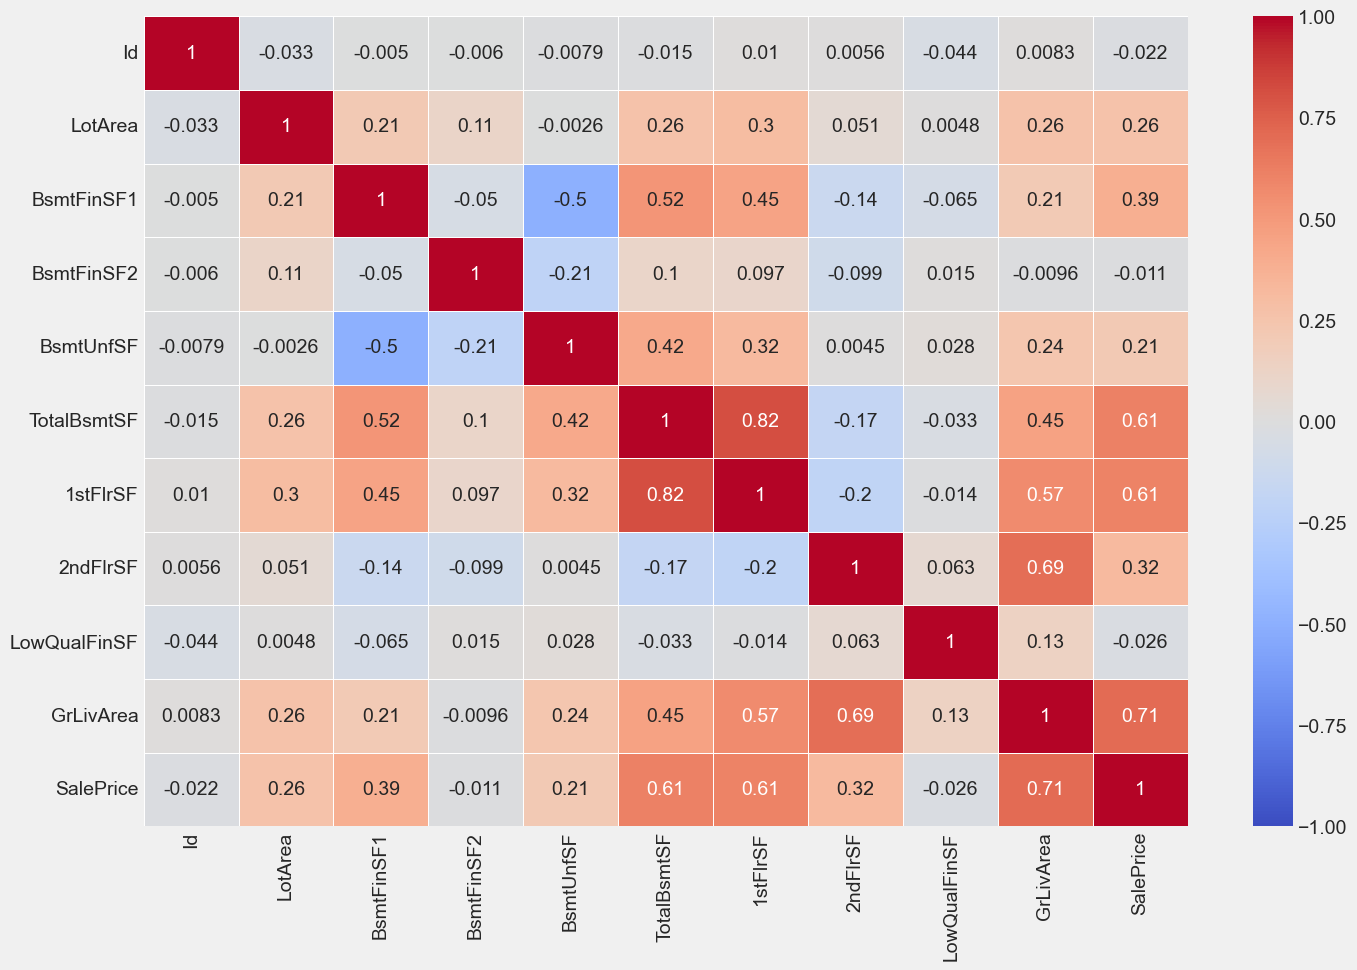

In [35]:
#First ten features

df_corr = df[num].iloc[:,0:10]
df_corr['SalePrice'] = df['SalePrice']
corr = df_corr.corr()

fig = plt.figure(figsize=(15,10))

sns.heatmap(corr,annot=True,linewidths=.5,cmap='coolwarm',vmin=-1,vmax=1,center=0);

# Insight:
- Above Ground Living Area sq ft is having a positive correlation of 0.71 with Sale Price which is obvious.
- Total Basement surface area and first floor surface area also have a positive correlation of 0.61 with Sale Price.
- We also expect LotArea to have a better correlation with Sale Price as increase in LotArea may also increase price of the house.
- We can see two features have negative correlation with SalePrice.
   1. BsmtFinSF2 [-0.011]
   2. LowQualFinSF [-0.026]

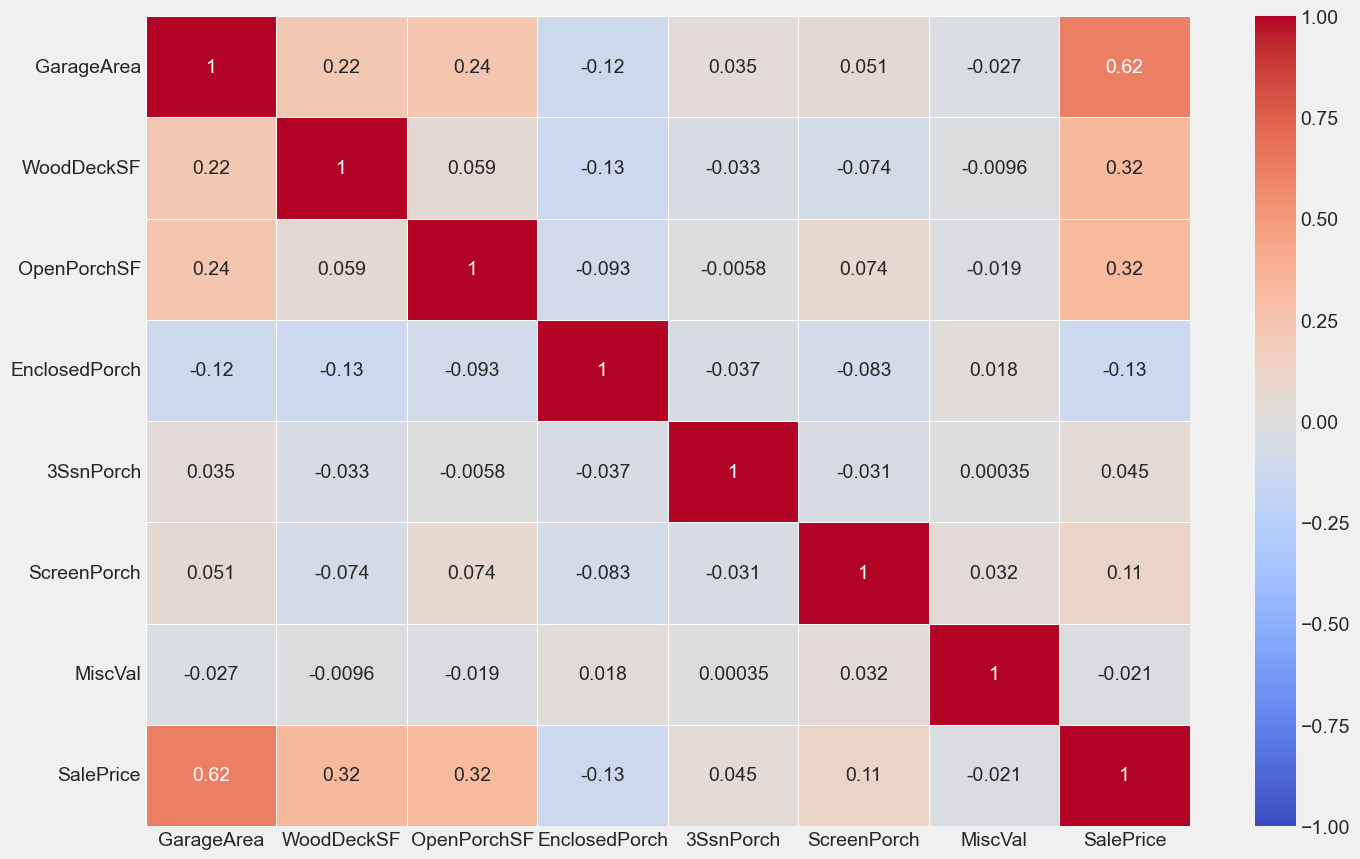

In [36]:
# Next features

df_corr = df[num].iloc[:,10:]
df_corr['SalePrice'] = df['SalePrice']
corr = df_corr.corr()

fig = plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,linewidths=.5,cmap='coolwarm',vmin=-1,vmax=1,center=0);

# Insight: 
- In the next ten features , Garage Area has a positive correlation of 0.62 with Sale Price.
- FullBath is having a positive correlation of 0.56.
- TotRmsAbvGrd feature has a 0.53 correlation with SalePrice.

In [37]:
fig = make_subplots(rows=2, cols=2)

features_to_examine = ['TotalBsmtSF','1stFlrSF','GrLivArea','GarageArea']

i=0
for row in range(1,3):
    for col in range(1,3):
        fig.add_trace(go.Scatter(y=df['SalePrice'],x=df[features_to_examine[i]],name=features_to_examine[i],
                                mode='markers'),row=row,col=col)
        i+=1
fig.update_layout(height=1000, showlegend=True,title_text="Positive Correlated features with Sale Price")
fig.show()

# Insight:
- The Scatterplot shows us the extent of correlation of the above positive correlated features from the heatmap.
- We can see that as the features on xaxis increases , Sale Price also increases.This shows the positive correlation between them.

## CATEGORICAL ANALYSIS

In [38]:
#Creating a list of all our categorical variables
cat=[]
for col in df.columns:
    if df[col].dtype=='object':
        cat.append(col)
        
#printing the list
print("Categorical variables :: \n\n{}".format(cat))

Categorical variables :: 

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


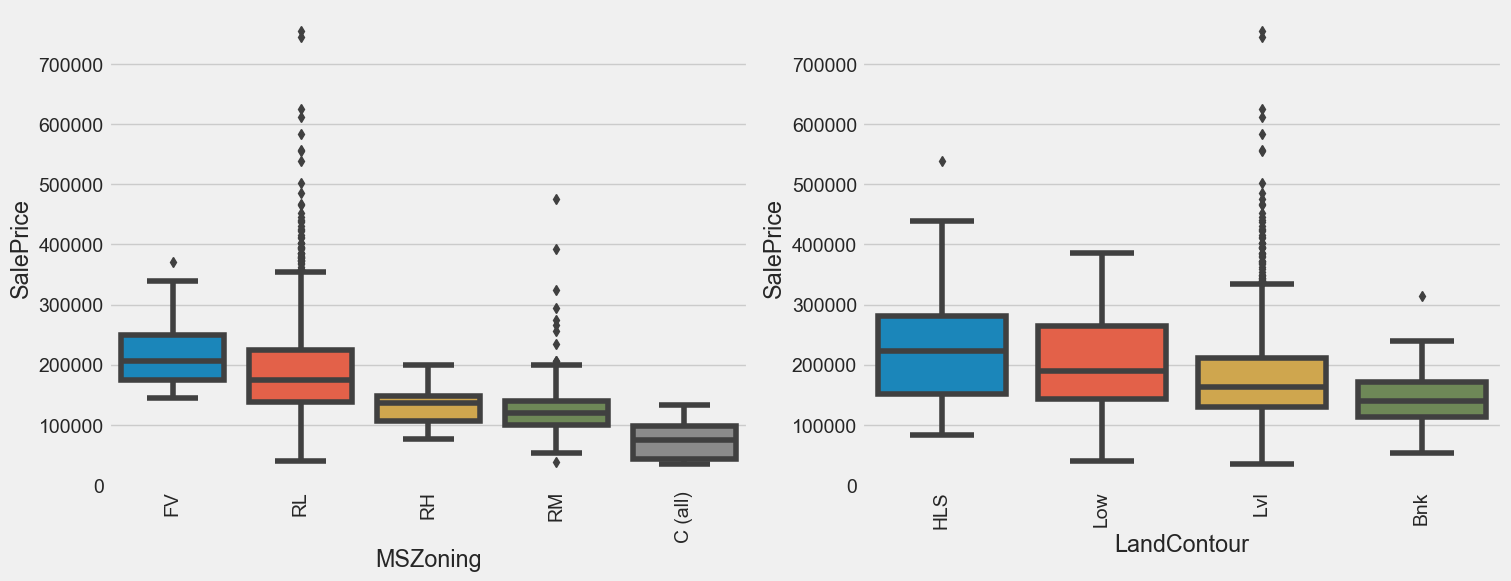

In [39]:
fig = plt.figure(constrained_layout=True,figsize=(15,20))
gs = gridspec.GridSpec(4, 2,figure=fig)

plt.subplot(gs[0,0])
table = df.groupby(['MSZoning'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=df,x='MSZoning',y="SalePrice",order=table['MSZoning'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[0,1])
table = df.groupby(['LandContour'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=df,x='LandContour',y="SalePrice",order=table['LandContour'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

# Insight:

- MSZoning:- Floating Village Residential zone (FV) is having higher Sale Price of around 2 lakhs.While Commercial zones are having the lowest Sale Price.And we see a variation in Sale Price in different zones which makes it an important feature for our prediction.
- LandContour:- If the house has significant slope on both sides (HLS) or is nearly flat(Low), Sale Price is more.For Depressed and Banked slopes , Sale price falls down.

C:\Users\aditi\AppData\Local\Temp\ipykernel_12604\1204244670.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\aditi\AppData\Local\Temp\ipykernel_12604\1204244670.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\aditi\AppData\Local\Temp\ipykernel_12604\1204244670.py:7: UserWarning:

You have mixed 

Text(0.5, 1.0, 'Street')

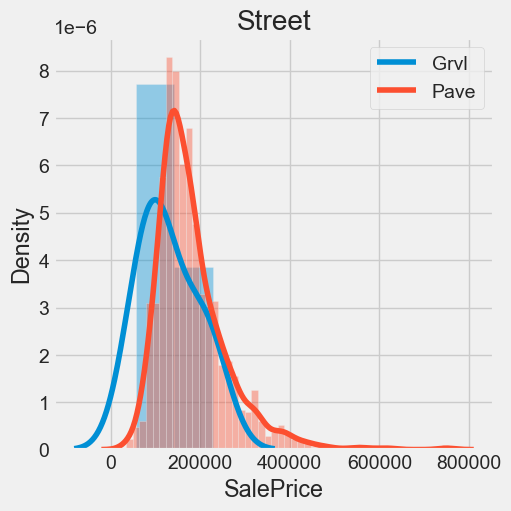

In [44]:
fig = plt.figure(constrained_layout=True,figsize=(5,5))
gs = gridspec.GridSpec(2, 2,figure=fig)


a1 = sns.distplot(df[df['Street']=='Grvl']['SalePrice'])
a1 = sns.distplot(df[df['Street']=='Pave']['SalePrice'])
plt.legend('upper right' , labels = ['Grvl','Pave'])
plt.xlabel("SalePrice")
plt.title("Street")

# Insight:
For flat stones or bricks access , Price is higher and majority of houses with gravel have price around 2 lakhs.But as there is very less data for Gravel street type . this feature is not that good for our prediction.

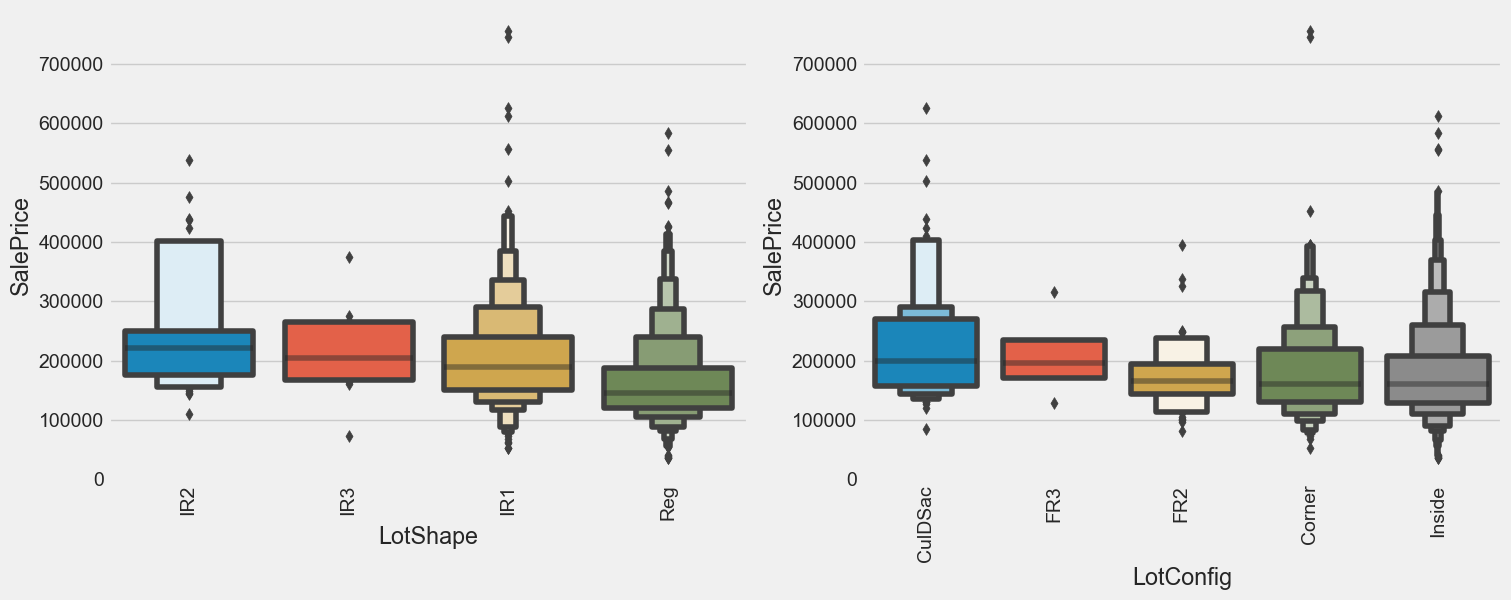

In [45]:
fig = plt.figure(constrained_layout=True,figsize=(15,20))
gs = gridspec.GridSpec(4, 2,figure=fig)

plt.subplot(gs[2,0])
table = df.groupby(['LotShape'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxenplot(data=df,x='LotShape',y="SalePrice",order=table['LotShape'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[2,1])
table = df.groupby(['LotConfig'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxenplot(data=df,x='LotConfig',y="SalePrice",order=table['LotConfig'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

# Insight:
- LotShape :- We can see that houses with regular shapes have low price.And as the irregularity increases , the average sale price of the house also increases.
- LotConfig :- The configuration of the lot does not appear to vary the price sginificantly.The properties with Cul de Sac(street or passage closed at one end) and FR3(Frontage on 3 sides of property) configuration on average are having high value than the other configurations.

C:\Users\aditi\AppData\Local\Temp\ipykernel_12604\1297196899.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\aditi\AppData\Local\Temp\ipykernel_12604\1297196899.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\aditi\AppData\Local\Temp\ipykernel_12604\1297196899.py:7: UserWarning:



`distplot` is

Text(0.5, 1.0, 'Land Slope')

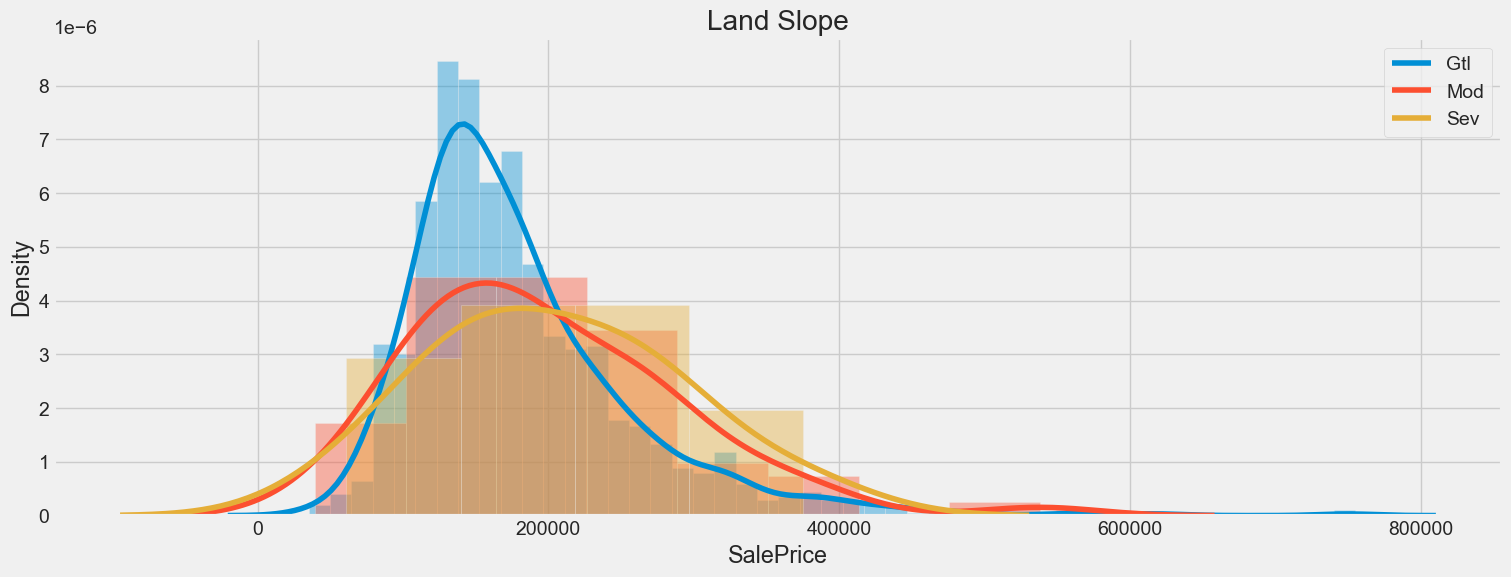

In [46]:
fig = plt.figure(constrained_layout=True,figsize=(15,20))
gs = gridspec.GridSpec(4, 2,figure=fig)

plt.subplot(gs[3,:])
a1 = sns.distplot(df[df['LandSlope']=='Gtl']['SalePrice'])
a1 = sns.distplot(df[df['LandSlope']=='Mod']['SalePrice'])
a1 = sns.distplot(df[df['LandSlope']=='Sev']['SalePrice'])
plt.legend('upper right' , labels = ['Gtl','Mod','Sev'])
plt.xlabel("SalePrice")
plt.title("Land Slope")


# Insight:
Most of the properties are having gentle slope and are lowest priced , while properties having moderate or severe slope have higher value.

In [58]:
#Changing Overall quality and condition's values to categorical values
#OverallQual: Rates the overall material and finish of the house
   
df['OverallQual'] = df['OverallQual'].replace({10:'Very Exc',9:'Exc',8:'VG',7:'Good',
                                                      6:'Abv Avg',5:'Avg',4:'Bel Avg',3:'Fair',
                                                      2:'Poor',1:'Very Poor'})

#Covert to object
df['OverallQual'] = df['OverallQual'].astype(object)

#OverallCond: Rates the overall condition of the house

df['OverallCond'] = df['OverallCond'].replace({10:'Very Exc',9:'Exc',8:'VG',7:'Good',
                                                      6:'Abv Avg',5:'Avg',4:'Bel Avg',3:'Fair',
                                                      2:'Poor',1:'Very Poor'})

#Covert to object
df['OverallCond'] = df['OverallCond'].astype(object)

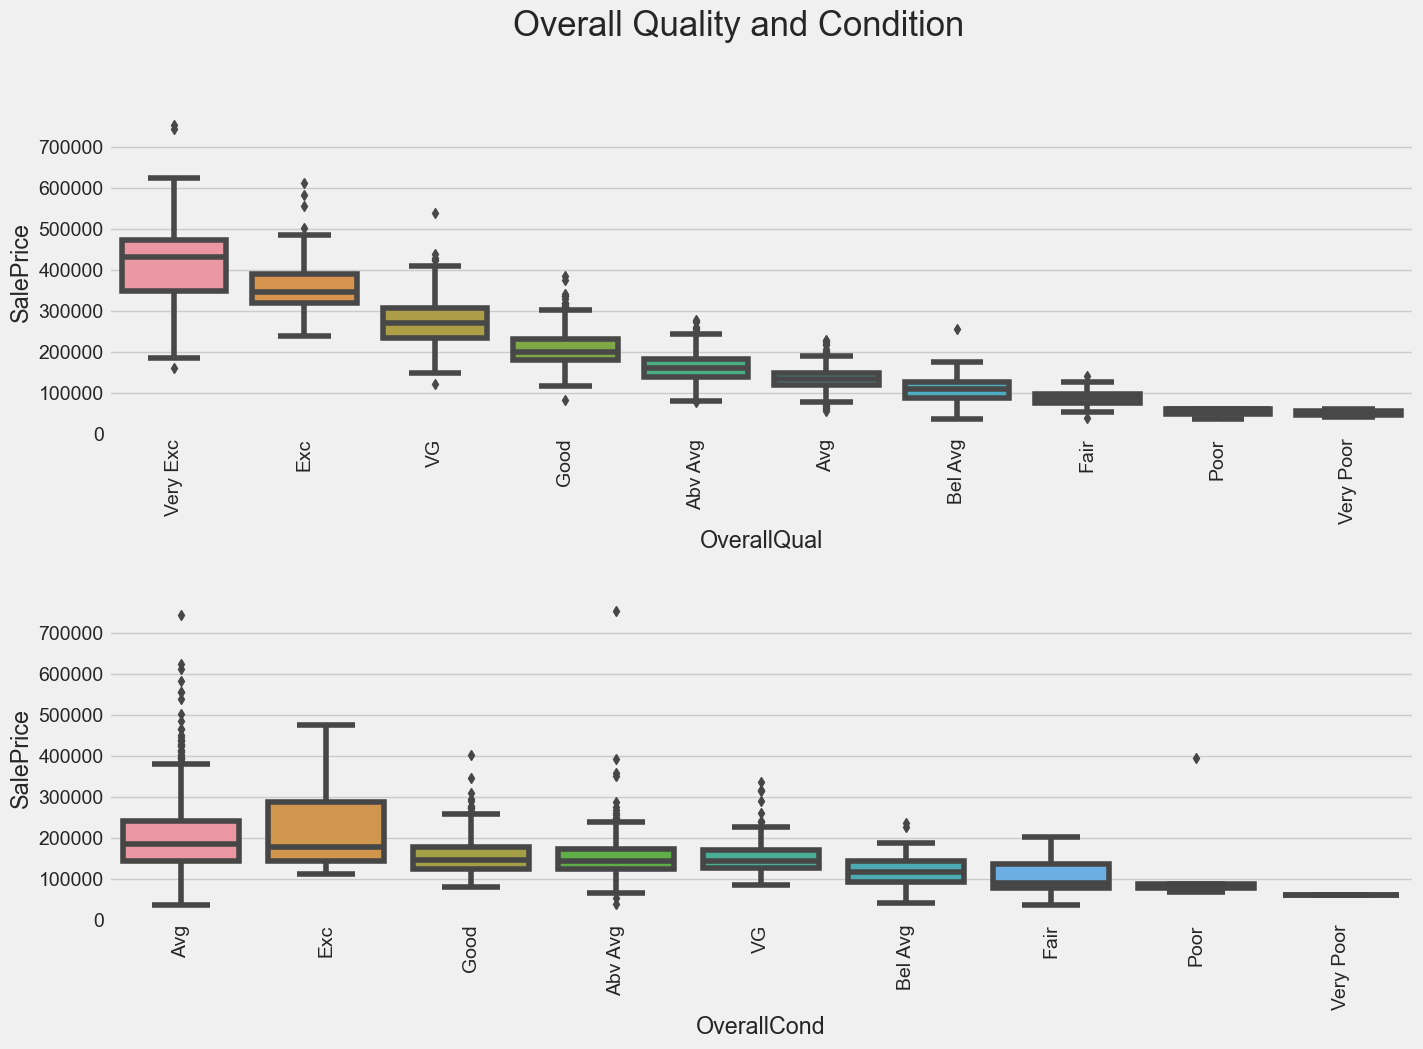

In [59]:
fig = plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

plt.subplot(2,1,1)
table = df.groupby(['OverallQual'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=df,x='OverallQual',y="SalePrice",order=table['OverallQual'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(2,1,2)
table = df.groupby(['OverallCond'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=df,x='OverallCond',y="SalePrice",order=table['OverallCond'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

fig.suptitle("Overall Quality and Condition",fontsize=25);

# Insight:
- Overall Quality :- It's obvious that if overall quality of the property is good , the Price will be high and we can clearly see that in the above box plot.This tells us that Overall Quality is an important feature in predicting Sale Price of the house.The below distribution gives us a better look of the variation in price with the overall quality.
- Overall Condition :- Most of the houses are in average condition and very few are in excellent condition as seen in the box plot and the below distribution.Properties in average and excellent condition are having average price high and the properties in very bad condition will have low sale price.

In [60]:
fig = px.histogram(df, x="SalePrice", color='OverallQual',barmode="overlay",title="Overall Quality of the house")
fig.update_layout(height=400)
fig.show()

fig = px.histogram(df, x="SalePrice", color='OverallCond',barmode="overlay",title="Overall Condition of the house")
fig.update_layout(height=400)
fig.show()

C:\Users\aditi\AppData\Local\Temp\ipykernel_12604\2707837967.py:17: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\aditi\AppData\Local\Temp\ipykernel_12604\2707837967.py:27: UserWarning:

FixedFormatter should only be used together with FixedLocator



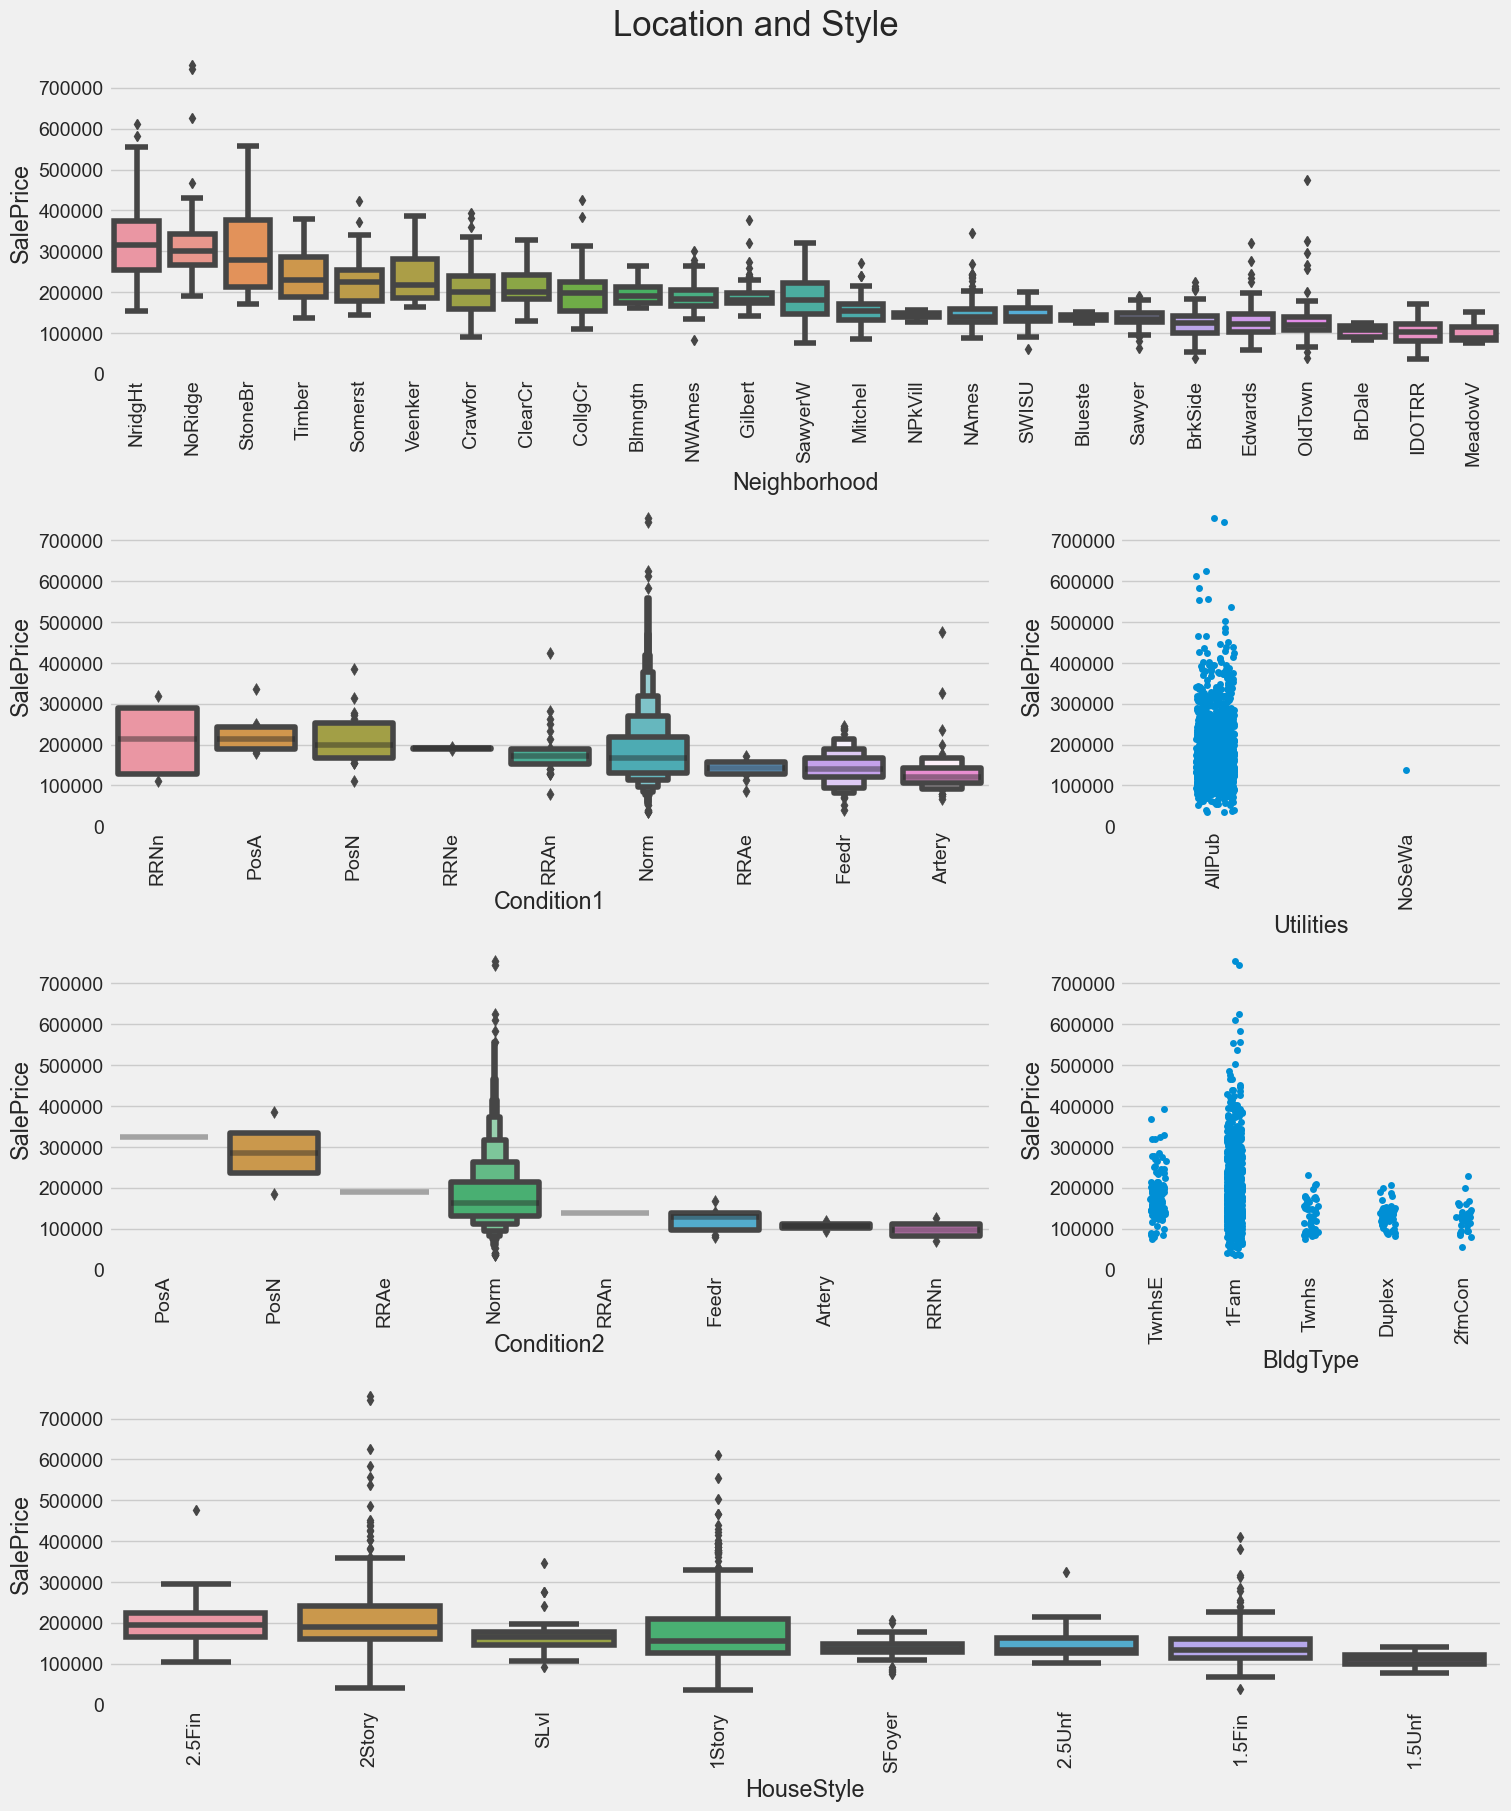

In [61]:
fig = plt.figure(constrained_layout=True,figsize=(15,18))
gs = GridSpec(4, 3, figure=fig)

plt.subplot(gs[0,:])
table = df.groupby(['Neighborhood'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=df,x='Neighborhood',y="SalePrice",order=table['Neighborhood'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[1,:-1])
table = df.groupby(['Condition1'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxenplot(data=df,x='Condition1',y="SalePrice",order=table['Condition1'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[1,-1])
table = df.groupby(['Utilities'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.stripplot(data=df,x='Utilities',y="SalePrice",order=table['Utilities'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[2,:-1])
table = df.groupby(['Condition2'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxenplot(data=df,x='Condition2',y="SalePrice",order=table['Condition2'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[2,-1])
table = df.groupby(['BldgType'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.stripplot(data=df,x='BldgType',y="SalePrice",order=table['BldgType'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[3,:])
table = df.groupby(['HouseStyle'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=df,x='HouseStyle',y="SalePrice",order=table['HouseStyle'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

fig.suptitle("Location and Style",fontsize=25);

# Insight:

- Building Type :- Single family detached dwellings have higher sale price compared to duplex,two family houses and townhouse dwellings
Condition 1 and 2 :- In Condition 1 and 2 , close proximity to conditions like streets lowers the sale price and to railroads ,price is high.
- House Styles :- 2 Story and 1 Story finished house styles have highest sale price than unfinished properties which is obvious.
- Neighborhood :- We can see variation in sale price in different neighborhoods.From Mitchell neighborhoods , all the neighbors to the right are having consistently low price.
- Utilities :- There are four utilities given in the description of this dataset.But we can only two utilities are available in our dataset.
   -  All Public utilities 
   -  Electricity and Gas only
- Out of 1460 data , only one house is having Electricity and gas utility in our dataset with Sale Price 137500.
Most of the properties with all public utilities have sale price between 1lakh to 2lakh

In [62]:
table = df.groupby(['Neighborhood'],as_index=False)['SalePrice'].median()
table = table.sort_values(by='SalePrice',ascending=False)
table.style.background_gradient(cmap='Reds')

# Insight:
- After NPkVill , all the neighbors are having sale price less than 1,40,000.
- And the least price for MeadowV neighborhood.

In [63]:
fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.5)

fig = px.histogram(df, x="SalePrice", color='RoofStyle',barmode="overlay",title='RoofStyle')
fig.update_layout(height=400)
fig.show()

fig = px.histogram(df, x="SalePrice", color='MasVnrType',barmode="overlay",title="Mason Veneer Type")
fig.update_layout(height=400)
fig.show()

<Figure size 1500x1500 with 0 Axes>

# Insight:
- Roof Styles :- Most of the house are having Gable and Hip roof styles and average sale price of 1.5lakhs.
The average highest sale price is for properties having Shed roof style and the lowest sale price. 

- Mason Veneer Types :- Most of the properties are not having Masonry veneer walls and have low sale price. Properties having masonry walls of Stone and Bricks have high value with Stone being highest.

In [64]:
fig = px.histogram(df, x="SalePrice", color='ExterQual',barmode="overlay",title='Exterior Quality')
fig.update_layout(height=400)
fig.show()

fig = px.histogram(df, x="SalePrice", color='ExterCond',barmode="overlay",title="Exterior Condition")
fig.update_layout(height=400)
fig.show()

# Insight:
- Exterior Quality :- If the exterior quality is good or excellent , The price will be more .Most of the properties have average exterior quality and very few have excellent exterior quality.
- Exterior Condition :- Average,good and excellent exterior condition properties will have higher sale price.And here also most of the properties have average exterior condition and only 3 properties in our dataset have excellent exterior condition.

In [65]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Box(y=df['SalePrice'],x=df['BsmtQual'],name='Basement Quality'),row=1,col=1)
fig.add_trace(go.Box(y=df['SalePrice'],x=df['BsmtExposure'],name='Basement Exposure'),row=1,col=2)
fig.update_layout( title_text="Basement Quality and Exposure",height=400)
fig.show()

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Violin(y=df['SalePrice'],x=df['BsmtFinType1'],name='Basement_Finish Type1 '),row=1,col=1)
fig.add_trace(go.Violin(y=df['SalePrice'],x=df['BsmtFinType2'],name='Basement_Finish Type2'),row=1,col=2)
fig.update_layout( title_text="Basement Finish Type 1 and 2",height=400)
fig.show()

# Insight:
- Basement Quality :- Here the Basement quality refers to height of the basement.So excellent means more than 100 inches and poor means less than 70 inches. So Properties with excellent and good basement quality will have higher sale price.

- Basement Exposure :- Basements with good exposure to garden or walkouts have higher sale price and properties with no basements or the ones which are not known have low sale price. Both of the above features help us in predicting Sale Price as we can see variation in Sale Price.

- Basment finish type 1 and 2 :- Good and Average living quarters and unfinished basements have higher average sale price in both type 1 and type 2 and below average finishes will obviously have less value.

C:\Users\aditi\AppData\Local\Temp\ipykernel_12604\721694662.py:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\aditi\AppData\Local\Temp\ipykernel_12604\721694662.py:10: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\aditi\AppData\Local\Temp\ipykernel_12604\721694662.py:11: UserWarning:



`distplot` is 

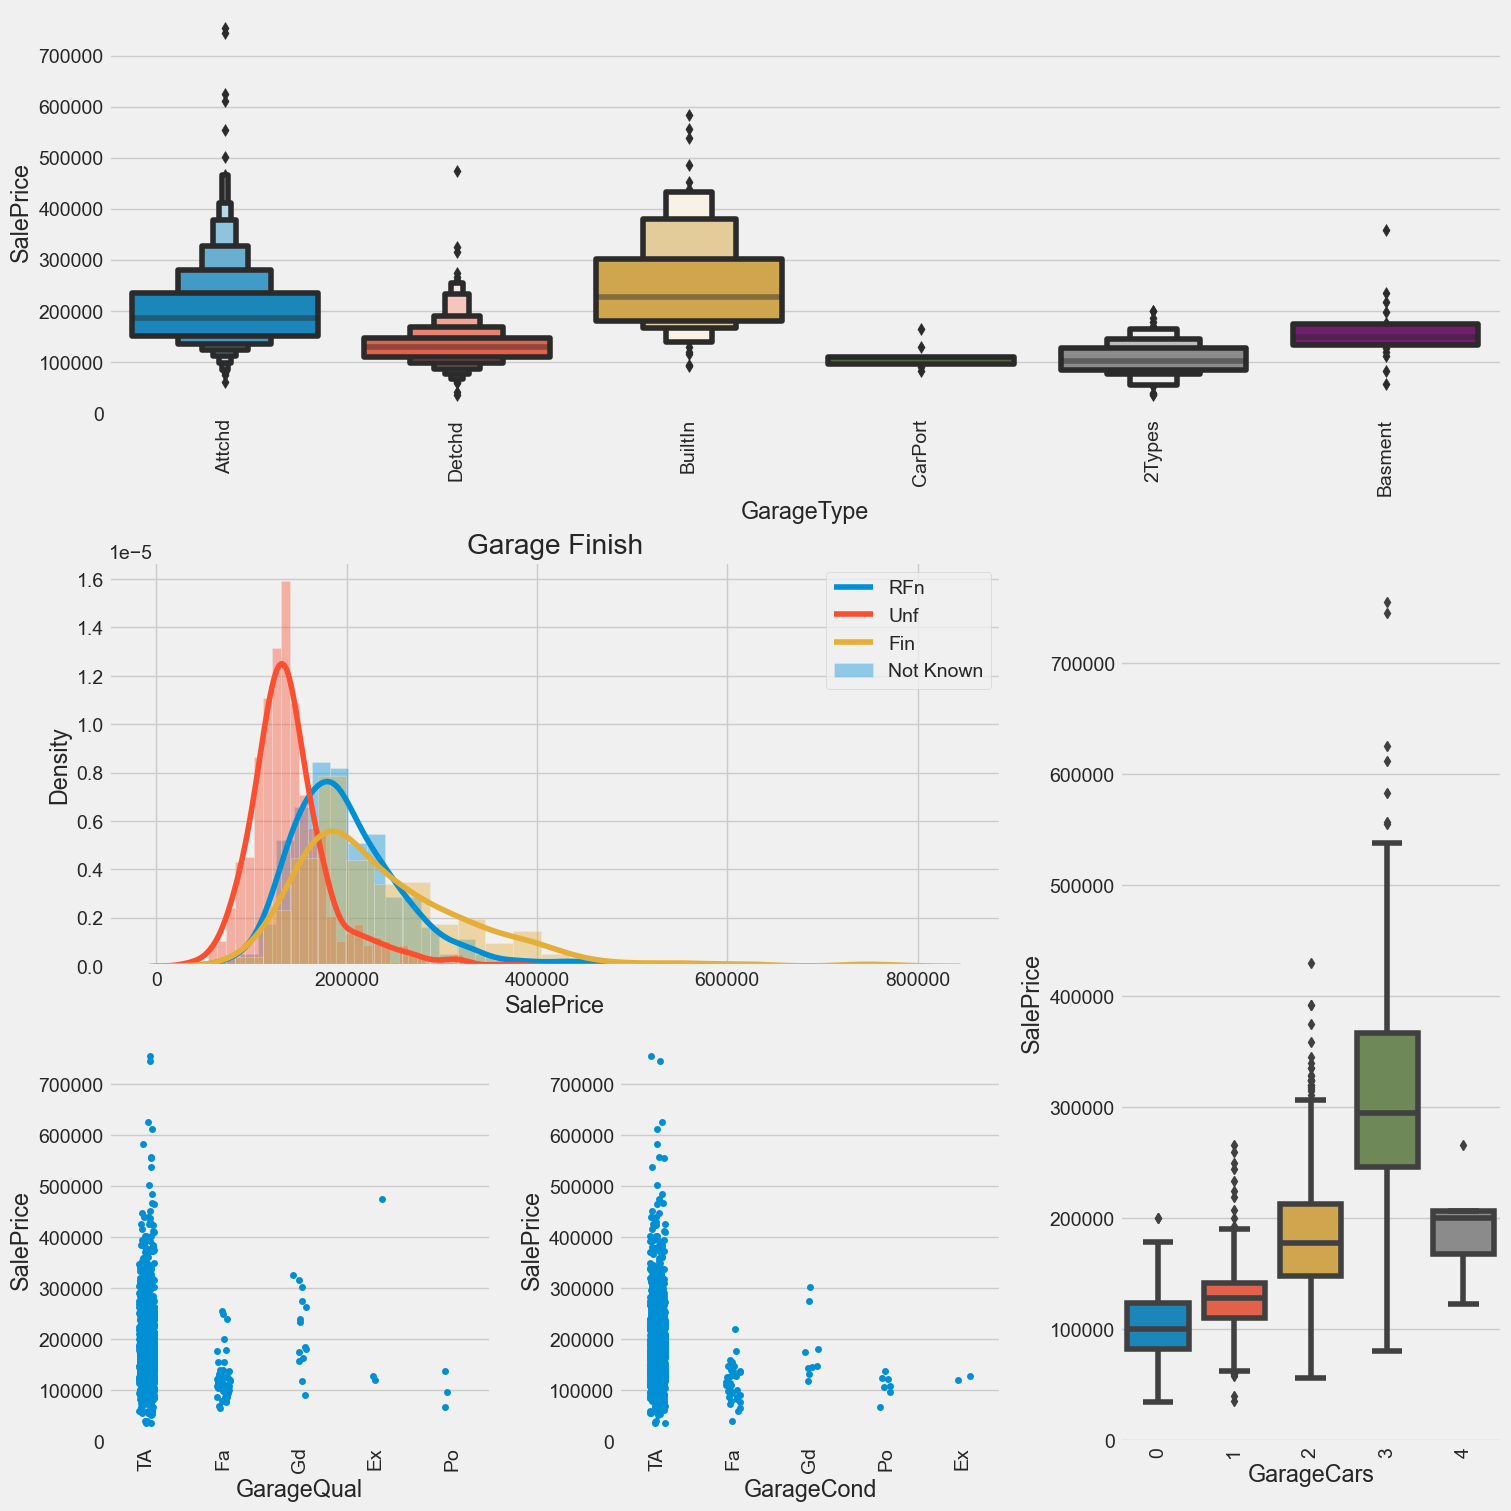

In [69]:
fig = plt.figure(constrained_layout=True,figsize=(15,15))
gs = GridSpec(3, 3, figure=fig)

plt.subplot(gs[0,:])
a1 = sns.boxenplot(data=df,x="GarageType",y="SalePrice")
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[1,:-1])
sns.distplot(df[df['GarageFinish']=='RFn']['SalePrice'])
sns.distplot(df[df['GarageFinish']=='Unf']['SalePrice'])
sns.distplot(df[df['GarageFinish']=='Fin']['SalePrice'])
sns.distplot(df[df['GarageFinish']=='Not Known']['SalePrice'])

plt.legend('upper right' , labels = ['RFn','Unf','Fin','Not Known'])
plt.xlabel("SalePrice")
plt.title("Garage Finish")

plt.subplot(gs[1:,-1])
a1 = sns.boxplot(data=df,x="GarageCars",y="SalePrice")
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[-1,0])
a1 = sns.stripplot(data=df,x="GarageQual",y="SalePrice")
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(gs[-1,-2])
a1 = sns.stripplot(data=df,x="GarageCond",y="SalePrice")
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

# Insight:
- Garage Type :- Houses with built in or attached garages tend to have the highest prices. Those without a garage or a car port tend to have the lowest price.
- Garage Finish :- Finished and roughly finished garages account for higher sale price than unfinished ones.And the properties which dont have a garage have the lowest price.
- GarageCars :- Here garage cars refers to size of garage in car capacity.So higher the number more the Sale Price.

In [71]:
px.histogram(df, x="SalePrice", color='PavedDrive',barmode="overlay",title="Paved Driveway")

# Insight:
Most of the houses have Paved driveway in our dataset and these properties have highest sale price than partial and dirt/gravel driveways.

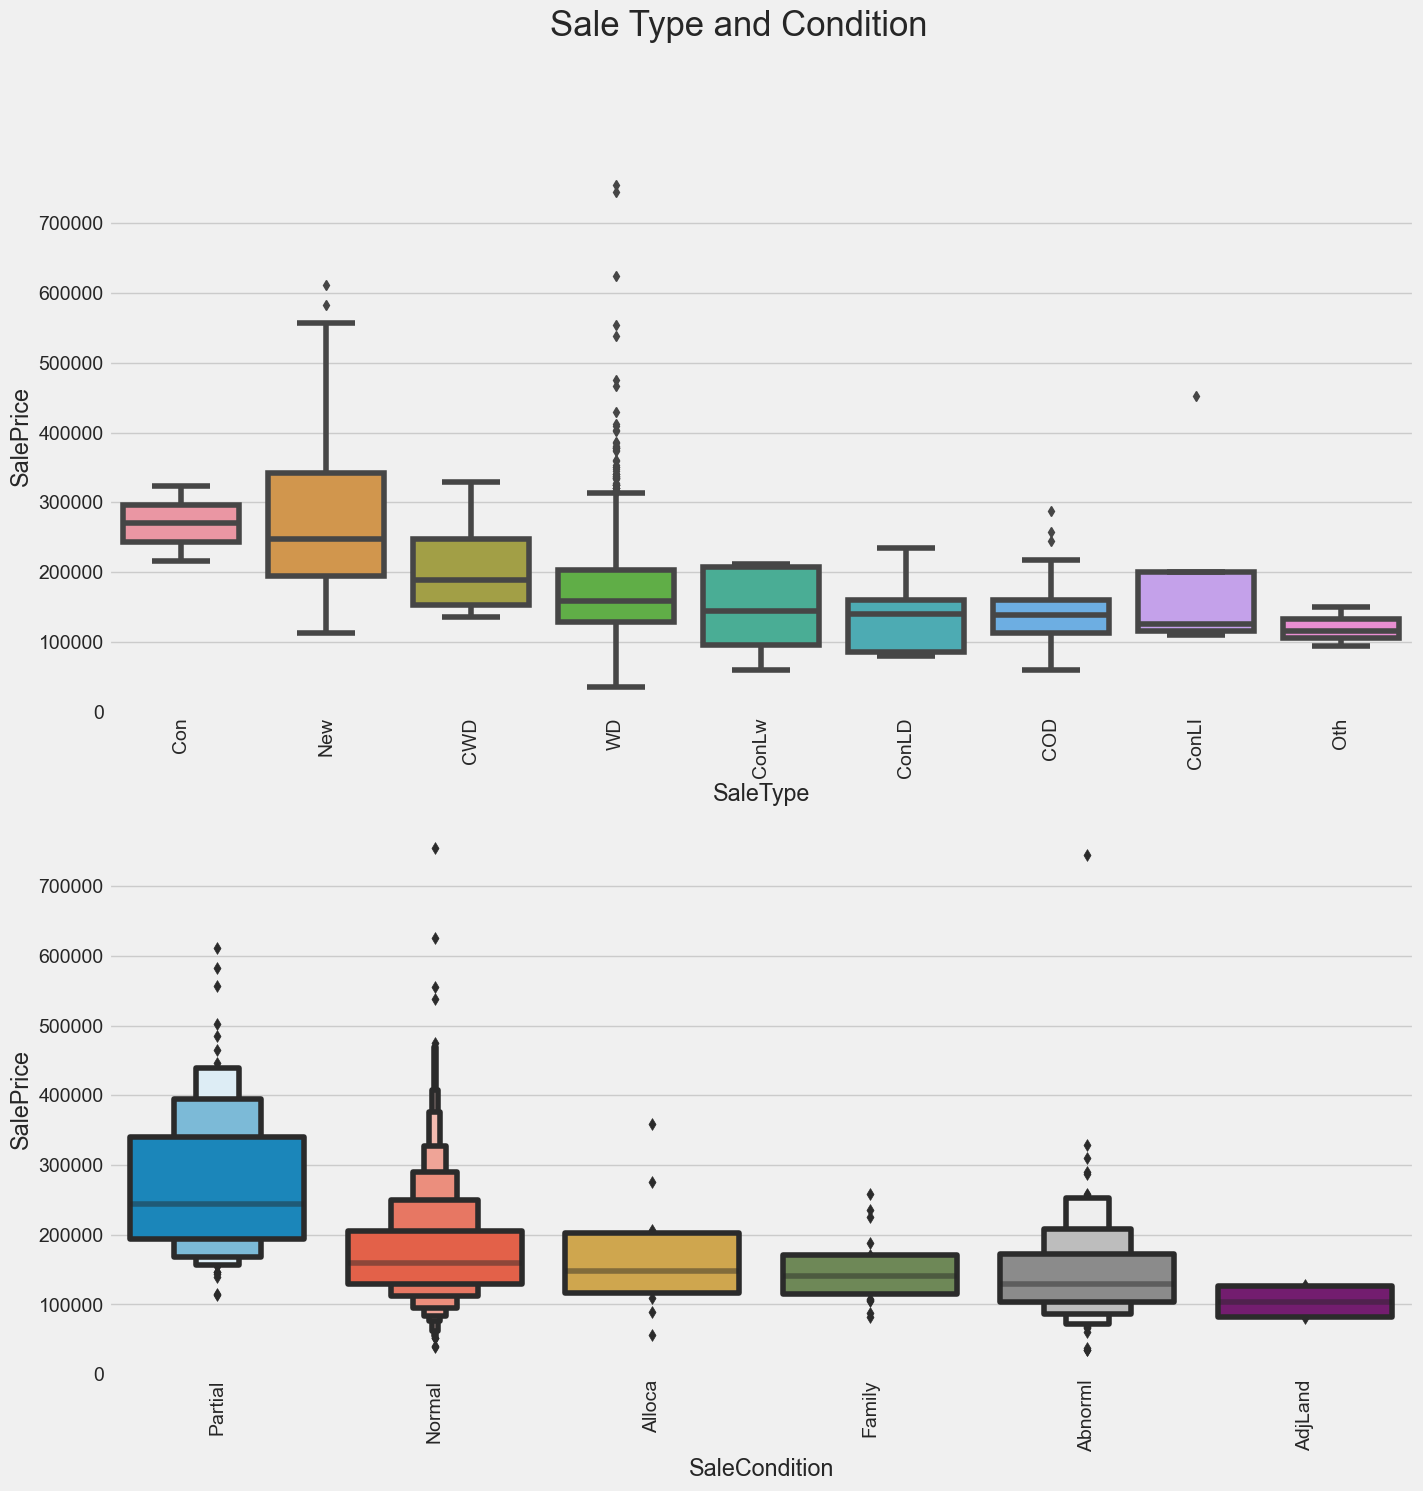

In [72]:
fig = plt.figure(figsize=(15,15))

plt.subplot(2,1,1)
table = df.groupby(['SaleType'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxplot(data=df,x='SaleType',y="SalePrice",order=table['SaleType'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

plt.subplot(2,1,2)
table = df.groupby(['SaleCondition'],as_index=False)['SalePrice'].median().sort_values(by='SalePrice',ascending=False)
a1 = sns.boxenplot(data=df,x='SaleCondition',y="SalePrice",order=table['SaleCondition'].to_list());
a1.set_xticklabels(a1.get_xticklabels(), rotation=90);

fig.suptitle("Sale Type and Condition",fontsize=25);

# Insight:
Both the variables above exhibit variation in sales price across the levels.

- Sale Type :- Most of the properties are on warranty deed sale.The manor in which the house is sold appears to have different price ranges.
- Sale Condition :- If the house to be sold is in partial or normal condition , the price will definitely be higher than the rest of the conditions.

In [73]:
year_features = ['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt']

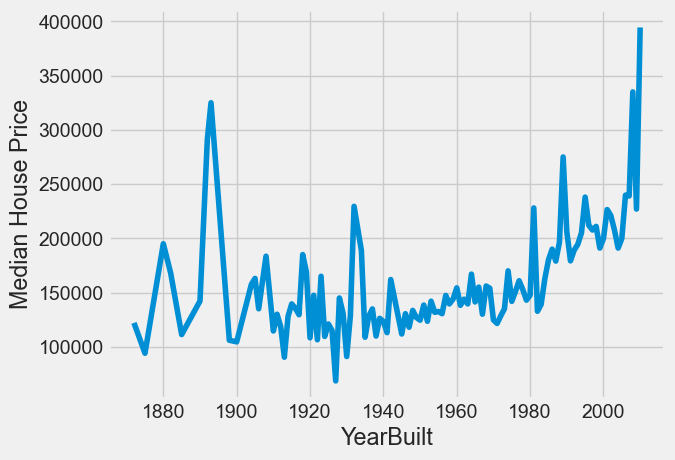

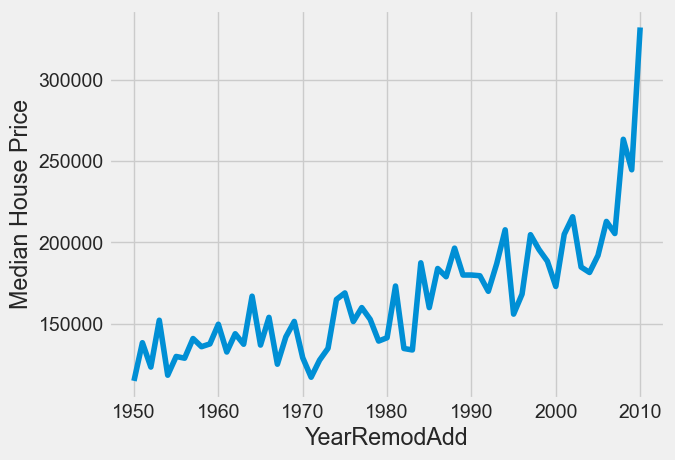

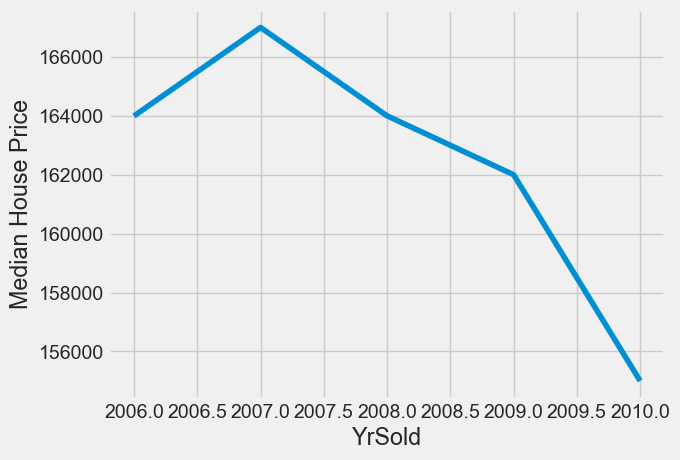

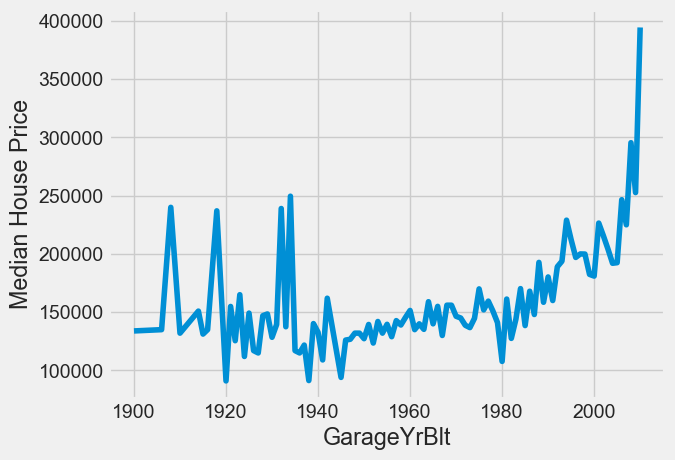

In [74]:
year_features = ['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt']

for feature in year_features:
    ax = df.groupby([feature])['SalePrice'].median().plot()
    plt.ylabel("Median House Price")
    plt.show()

# Insight:
- We can see that the houses and garage which were built and remoddeled during 90s have less Sale Price than the newer ones.
- With every year , House price increases.
- But if see ,Year Sold feature the Price falls down with each year which is strange.

In [75]:
data=df.copy()
data['Sold-Built'] = data['YrSold'] - data['YearBuilt']
fig=px.scatter(data,x="Sold-Built",y="SalePrice",width=700)
fig.show()

data=df.copy()
data['Sold-Remodelled'] = data['YrSold'] - data['YearRemodAdd']
fig=px.scatter(data,x="Sold-Remodelled",y="SalePrice",width=700)
fig.show()

data=df.copy()
data['Sold-GarageBuilt'] = data['YrSold'] - data['GarageYrBlt']
fig=px.scatter(data,x="Sold-GarageBuilt",y="SalePrice",width=700)
fig.show()

# Insight:
This clearly shows that the more the house is old , less is the Sale Price.

![](https://th.bing.com/th/id/R.c9546c141a2e4edc811fa777982db658?rik=G3noYvb3HAoT1g&pid=ImgRaw&r=0)

# ----------------------------------------------MODELLING-----------------------------------------------

![](https://th.bing.com/th/id/R.07081b4b1c18517b341d5f237c4963f8?rik=n%2ffyUpQPR7qKBQ&pid=ImgRaw&r=0)

# Encoding categorical columns into numerical columns

In [76]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [77]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [78]:
col_list = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']

In [79]:
for i in col_list:
    df[i] = le.fit_transform(df[i])

In [80]:
df

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0        1           5         3           36      327       1      1   
1        2           0         3           52      498       1      1   
2        3           5         3           39      702       1      1   
3        4           6         3           31      489       1      1   
4        5           5         3           56      925       1      1   
...    ...         ...       ...          ...      ...     ...    ...   
1455  1456           5         3           33      267       1      1   
1456  1457           0         3           57      866       1      1   
1457  1458           6         3           37      415       1      1   
1458  1459           0         3           39      505       1      1   
1459  1460           0         3           47      532       1      1   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0            3            3          0  ...         0       0      0   
1            3            3          0  ...         0       0      0   
2            0            3          0  ...         0       0      0   
3            0            3          0  ...         0       0      0   
4            0            3          0  ...         0       0      0   
...        ...          ...        ...  ...       ...     ...    ...   
1455         3            3          0  ...         0       0      0   
1456         3            3          0  ...         0       0      2   
1457         3            3          0  ...         0       0      0   
1458         3            3          0  ...         0       0      0   
1459         3            3          0  ...         0       0      0   

      MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0               0        0       1       2         8              4        412  
1               0        0       4       1         8              4        339  
2               0        0       8       2         8              4        442  
3               0        0       1       0         8              0        194  
4               0        0      11       2         8              4        494  
...           ...      ...     ...     ...       ...            ...        ...  
1455            0        0       7       1         8              4        314  
1456            0        0       1       4         8              4        415  
1457            2       17       4       4         8              4        527  
1458            0        0       3       4         8              4        199  
1459            0        0       5       2         8              4        221  

[1460 rows x 81 columns]

In [81]:
x = df[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']]
y = df['SalePrice']

In [82]:
x

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0              5         3           36      327       1      1         3   
1              0         3           52      498       1      1         3   
2              5         3           39      702       1      1         0   
3              6         3           31      489       1      1         0   
4              5         3           56      925       1      1         0   
...          ...       ...          ...      ...     ...    ...       ...   
1455           5         3           33      267       1      1         3   
1456           0         3           57      866       1      1         3   
1457           6         3           37      415       1      1         3   
1458           0         3           39      505       1      1         3   
1459           0         3           47      532       1      1         3   

      LandContour  Utilities  LotConfig  ...  ScreenPorch  PoolArea  PoolQC  \
0               3          0          4  ...            0         0       0   
1               3          0          2  ...            0         0       0   
2               3          0          4  ...            0         0       0   
3               3          0          0  ...            0         0       0   
4               3          0          2  ...            0         0       0   
...           ...        ...        ...  ...          ...       ...     ...   
1455            3          0          4  ...            0         0       0   
1456            3          0          4  ...            0         0       0   
1457            3          0          4  ...            0         0       0   
1458            3          0          4  ...            0         0       0   
1459            3          0          4  ...            0         0       0   

      Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0         0            0        0       1       2         8              4  
1         0            0        0       4       1         8              4  
2         0            0        0       8       2         8              4  
3         0            0        0       1       0         8              0  
4         0            0        0      11       2         8              4  
...     ...          ...      ...     ...     ...       ...            ...  
1455      0            0        0       7       1         8              4  
1456      2            0        0       1       4         8              4  
1457      0            2       17       4       4         8              4  
1458      0            0        0       3       4         8              4  
1459      0            0        0       5       2         8              4  

[1460 rows x 79 columns]

In [83]:
y

0       412
1       339
2       442
3       194
4       494
       ... 
1455    314
1456    415
1457    527
1458    199
1459    221
Name: SalePrice, Length: 1460, dtype: int64

In [84]:
df.dtypes

Id               int64
MSSubClass       int64
MSZoning         int32
LotFrontage      int64
LotArea          int64
                 ...  
MoSold           int64
YrSold           int64
SaleType         int32
SaleCondition    int32
SalePrice        int64
Length: 81, dtype: object

# Decision Tree

In [85]:
# Import train-test scikit learn
from sklearn.model_selection import train_test_split

In [86]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [87]:
# Spliting the data for train and test 
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.3,random_state=100)

In [88]:
clf = DecisionTreeRegressor(min_samples_split = 50 , max_depth = 10)

In [89]:
clf = clf.fit(x_train, y_train)

In [90]:
clf

DecisionTreeRegressor(max_depth=10, min_samples_split=50)

In [91]:
train_pred = clf.predict(x_train)

In [92]:
train_pred

array([360.5106383 , 571.97560976, 360.5106383 , 498.23529412,
       408.69565217, 204.72222222, 296.53846154, 296.53846154,
       498.23529412, 217.2195122 , 360.5106383 , 421.25      ,
       571.97560976, 360.5106383 , 408.69565217, 148.10638298,
       360.5106383 , 148.10638298, 408.69565217, 408.69565217,
        83.24390244, 209.70212766, 360.5106383 , 571.97560976,
       408.69565217, 217.2195122 , 571.97560976, 498.23529412,
       498.23529412,  83.24390244,  83.24390244, 183.33333333,
       408.69565217, 217.2195122 , 571.97560976, 571.97560976,
       498.23529412, 360.5106383 , 571.97560976, 107.84615385,
        83.24390244, 360.5106383 , 217.2195122 , 498.23529412,
       209.70212766, 498.23529412, 498.23529412,  83.24390244,
       571.97560976, 421.25      , 360.5106383 , 408.69565217,
       148.10638298, 408.69565217, 148.10638298, 148.10638298,
       209.70212766, 571.97560976, 209.70212766,  83.24390244,
       217.2195122 , 360.5106383 , 209.70212766, 571.97

In [93]:
test_pred = clf.predict(x_test)

In [94]:
test_pred

array([148.10638298, 421.25      , 408.69565217, ...,  83.24390244,
       571.97560976,  83.24390244])

# Plotting the decision tree

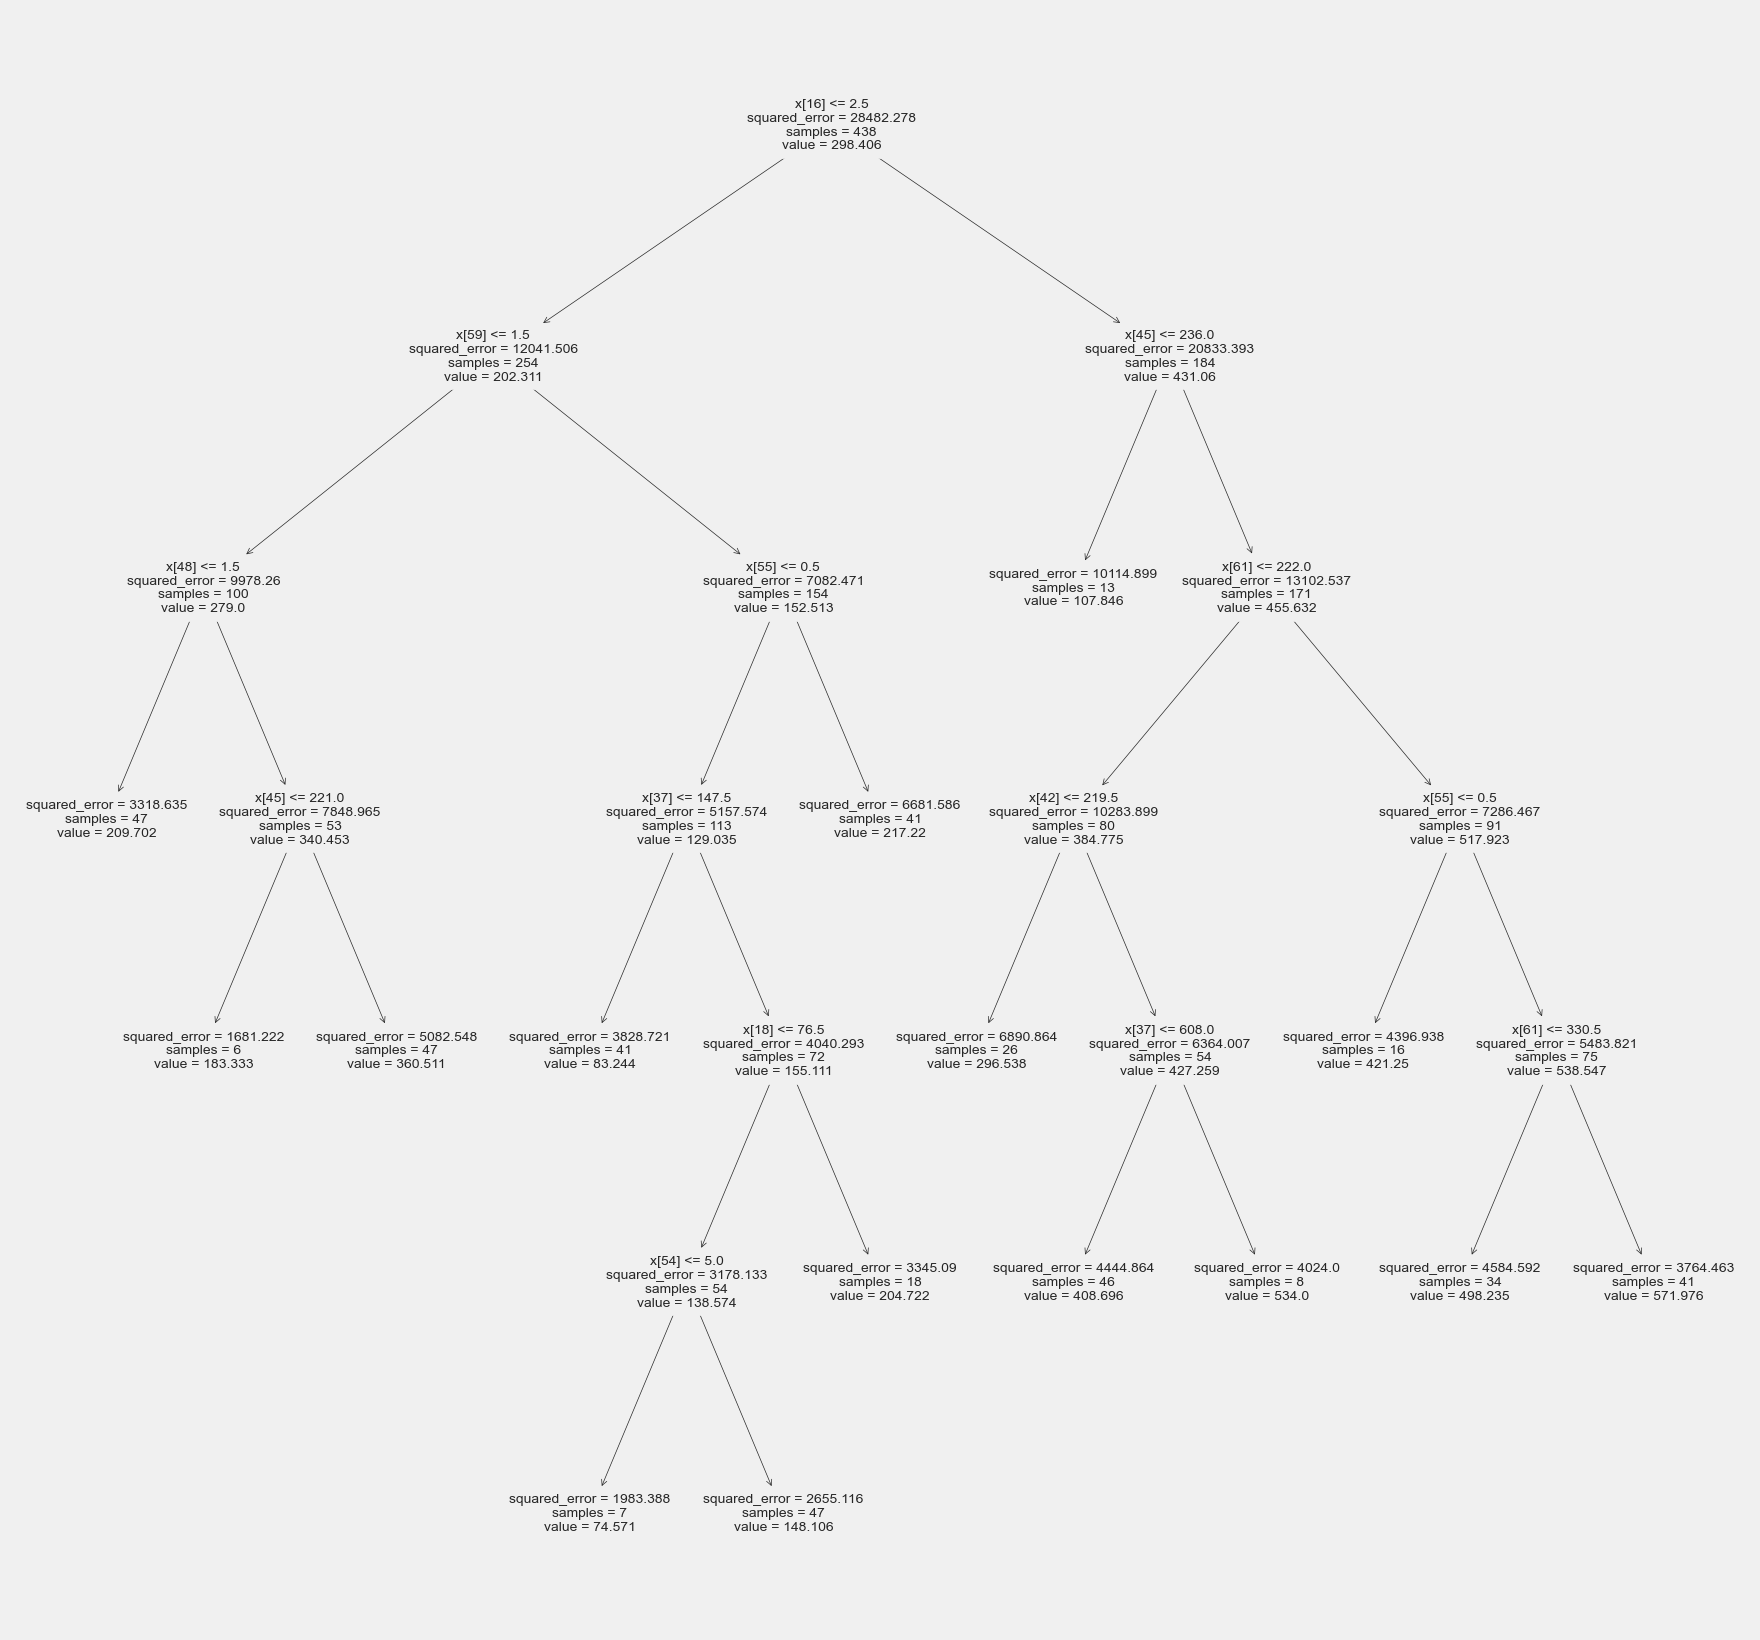

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
tree.plot_tree(clf, fontsize=10)
plt.show()

![](https://th.bing.com/th/id/R.bc68ba7363490ea1c6dbd8280a014693?rik=UCyZFad4b5wycA&pid=ImgRaw&r=0)

# Calculating Scores for Decision Tree (Training data)

In [96]:
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score,mean_squared_error

In [97]:
# Predicting the price for the train values
y_pred_train_clf = clf.predict(x_train)

# Mean Squared error (Training data)

In [98]:
# Calculating the Mean square error
mean_squared_error(y_train,y_pred_train_clf)

4480.897883293624

In [99]:
mse_train_clf = mean_squared_error(y_train,y_pred_train_clf)

# Checking the training RSME

In [100]:
import math
math.sqrt(mse_train_clf)

66.93950913543976

In [101]:
rmse_train_clf = math.sqrt(mse_train_clf)

# R Sqaure (Training data)

In [102]:
# Calculating the R square value
rsq_train_clf = r2_score(y_train,y_pred_train_clf)

# Calculating Scores for Decision Tree (Testing data)

In [103]:
# Predicting the price for the train values
y_pred_test_clf = clf.predict(x_test)

# Mean Squared error (Testing data)

In [104]:
# calculate Mean square error
mean_squared_error(y_test,y_pred_test_clf)

9200.367713108002

In [105]:
mse_test_clf = mean_squared_error(y_test,y_pred_test_clf)

# Checking the testing RSME

In [106]:
import math
math.sqrt(mse_test_clf)

95.91854728418275

In [107]:
rmse_test_clf = math.sqrt(mse_test_clf)

# R Square (Testing data)

In [108]:
# Calculating R square value
rsq_test_clf = r2_score(y_test,y_pred_test_clf)

# FINAL SCORES FOR DECISION TREE---------------------------------------------------------

In [109]:
print('Mean Squared error of training decision tree :',mse_train_clf)
print('Mean Squared error of testing decision tree :',mse_test_clf)

print('R-sq of training decision tree :',rsq_train_clf)
print('R-sq of testing decision tree :',rsq_test_clf)

print("RMSE_Training_DecisionTree:", rmse_train_clf)
print("RMSE_Testing_DecisionTree:", rmse_test_clf)

Mean Squared error of training decision tree : 4480.897883293624
Mean Squared error of testing decision tree : 9200.367713108002
R-sq of training decision tree : 0.8426776847029496
R-sq of testing decision tree : 0.6815994024463206
RMSE_Training_DecisionTree: 66.93950913543976
RMSE_Testing_DecisionTree: 95.91854728418275


![](https://th.bing.com/th/id/R.40958c7485f1ddb97d1e63b50c4c31dc?rik=bD5JM54%2fX1WCtw&pid=ImgRaw&r=0)

# Regression

In [110]:
# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression

In [111]:
# Fitting the model
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [112]:
# Predicting the price for the train values.
y_pred_train_lr = lr.predict(x_train)

In [113]:
# Predicting the price for the Test values
y_pred_test_lr = lr.predict(x_test)

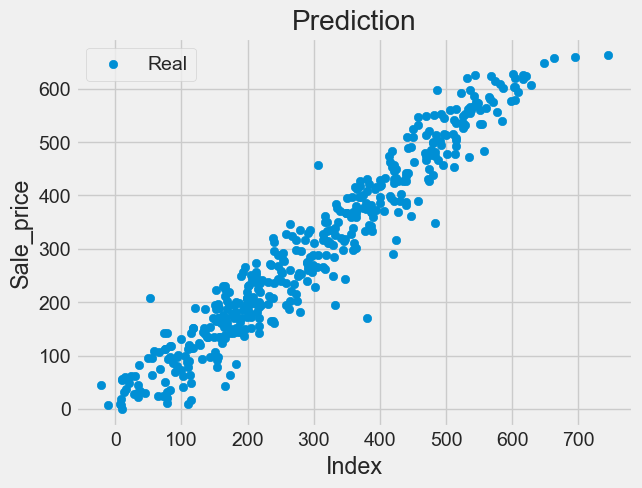

In [114]:
import matplotlib.pyplot as plt
plt.xlabel('Index')
plt.ylabel('Sale_price')
plt.title('Prediction')

plt.scatter(y_pred_train_lr,y_train)


# Function add a legend  
plt.legend(["Real", "Predicted"])

# Plotting the predictions of the real values in y_test and the predicted y_test values of the lr model.

In [115]:
x_range = [i for i in range(len(y_test))]

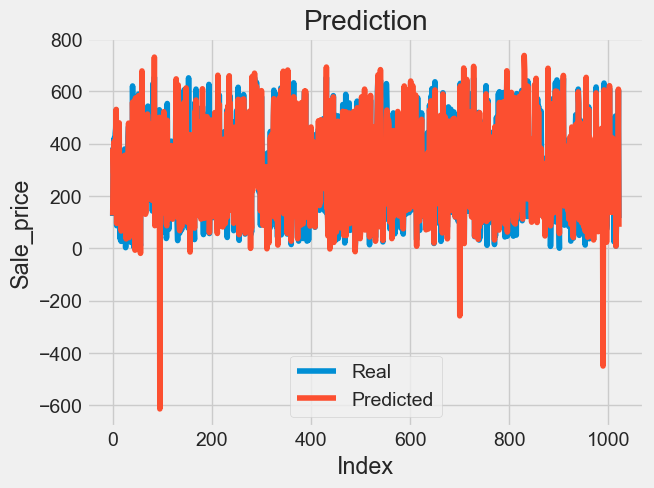

In [116]:
plt.xlabel('Index')
plt.ylabel('Sale_price')
plt.title('Prediction')

plt.plot(x_range,y_test)
plt.plot(x_range,y_pred_test_lr)

# Function add a legend  
plt.legend(["Real", "Predicted"])

# Plotting the predictions for testing data

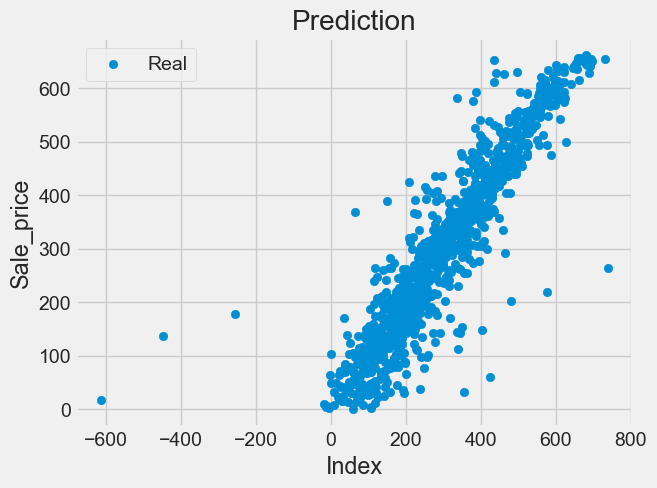

In [117]:
plt.xlabel('Index')
plt.ylabel('Sale_price')
plt.title('Prediction')

plt.scatter(y_pred_test_lr,y_test)


# Function add a legend  
plt.legend(["Real", "Predicted"])

# Calculating scores for Multiple Regression (Training data)

# Mean squared error for Training data

In [131]:
mse_train_lr = mean_squared_error(y_train,y_pred_train_lr)

In [132]:
mse_train_lr

1861.1074861144323

# Checking the Training RSME

In [133]:
import math
math.sqrt(mse_train_lr)

43.14055500471027

In [134]:
rmse_train_lr = math.sqrt(mse_train_lr)

# R-Square (Training Data)

In [135]:
# Calculate R square value
rsq_train_lr = r2_score(y_train,y_pred_train_lr)

In [136]:
rsq_train_lr

0.9346573507457435

# Calculating scores for Multiple Regression (Testing data)

# Mean squared error for Training data

In [137]:
mse_test_lr = mean_squared_error(y_test,y_pred_test_lr)

In [138]:
mse_test_lr

4817.7843929746605

# Checking the Testing RSME

In [139]:
import math
math.sqrt(mse_test_lr)

69.41026143859898

In [140]:
rmse_test_lr = math.sqrt(mse_test_lr)

# R-Square (Testing Data)

In [143]:
# Calculate R square value
r2_score(y_test,y_pred_test_lr)

0.8332691173394717

In [144]:
rsq_test_lr = r2_score(y_test,y_pred_test_lr)

# FINAL SCORES FOR MULTIPLE LINEAR REGRESSION --------------------------------

In [145]:
print('Mean Squared error of training lr :',mse_train_lr)
print('Mean Squared error of testing lr:',mse_test_lr)

print('R-sq of training lr :',rsq_train_lr)
print('R-sq of testing lr :',rsq_test_lr)

print("RMSE_Training_lr:", rmse_train_lr)
print("RMSE_Testing_lr:", rmse_test_lr)

Mean Squared error of training lr : 1861.1074861144323
Mean Squared error of testing lr: 4817.7843929746605
R-sq of training lr : 0.9346573507457435
R-sq of testing lr : 0.8332691173394717
RMSE_Training_lr: 43.14055500471027
RMSE_Testing_lr: 69.41026143859898


![](https://th.bing.com/th/id/R.eea88d0dd53bf254b3dfb1cf66726b2e?rik=5o3VBYOLrgZxTg&pid=ImgRaw&r=0)

# Python Function

In [147]:
def make_prediction(feature1, feature2, feature3):
    # Loading the trained model
    model = load_model('my_trained_model.h5')

    # Create a numpy array from the input features
    input_data = np.array([[feature1, feature2, feature3]])

    # Make a prediction using the model
    predicted_value = model.predict(input_data)

    # Return the predicted value
    return predicted_value[0]

In this example, the make_prediction function takes three input parameters (feature1, feature2, and feature3), which are used to create a numpy array containing the input data. The function then uses a pre-trained model (which is assumed to be saved in a file called my_trained_model.h5) to make a prediction based on the input data. The predicted value is returned as the output of the function.